In [968]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore")

**New York City Taxi and Limousine Commission (NYC TLC)**

sebuah badan pemerintah di Kota New York yang bertanggung jawab untuk mengawasi, memberikan lisensi, dan mengatur operasi berbagai jenis kendaraan untuk transportasi umum di kota tersebut. Ini termasuk taksi Medallion (taksi kuning yang ikonik di NYC), kendaraan sewaan seperti "black cars" dan limusin mewah, van komuter, serta kendaraan paratransit yang melayani penumpang dengan kebutuhan khusus.

Komisi ini bertujuan untuk memastikan bahwa layanan transportasi yang diberikan kepada masyarakat memenuhi standar keselamatan, kualitas, dan kenyamanan. NYC TLC juga bertanggung jawab atas regulasi tarif, pengawasan perilaku pengemudi, dan penegakan hukum terkait transportasi umum. Mereka mengatur sekitar 100.000 kendaraan dan 170.000 pengemudi yang terdaftar di kota New York.

**Business Problem**
- Revenue yang dihasilkan belum Maksimal pada bulan Januari 2023

**Dictionary pada data set NYC TLC Trip Record:**

dataset yang berisi catatan perjalanan taksi dan kendaraan sewaan (For-Hire Vehicles/FHV) yang beroperasi di bawah pengawasan New York City Taxi and Limousine Commission (TLC). Dataset ini mencakup informasi rinci tentang setiap perjalanan yang dilakukan oleh taksi kuning, taksi hijau (boro taxis), dan kendaraan sewaan seperti Uber dan Lyft di New York City.

1. VendorID
- Deskripsi: Kode yang menunjukkan penyedia layanan yang terkait dengan catatan perjalanan.
Nilai yang Mungkin:
- 1: Creative Mobile Technologies, LLC (CMT)
- 2: VeriFone Inc. (VTS)
2. lpep_pickup_datetime
- Deskripsi: Tanggal dan waktu ketika meteran taksi mulai berjalan.
3. lpep_dropoff_datetime
- Deskripsi: Tanggal dan waktu ketika meteran taksi berhenti.
4. store_and_fwd_flag
- Deskripsi: Tanda ini menunjukkan apakah catatan perjalanan disimpan di memori kendaraan sebelum dikirim ke penyedia layanan karena kendaraan tidak memiliki koneksi ke server.
Nilai yang Mungkin:
Y: Perjalanan disimpan dan diteruskan
N: Perjalanan tidak disimpan dan diteruskan
5. RatecodeID
- Deskripsi: Kode tarif akhir yang berlaku di akhir perjalanan.
Nilai yang Mungkin:
- 1: Standart rate
- 2: JFK : Ini adalah tarif tetap yang dikenakan untuk perjalanan antara Manhattan dan Bandara Internasional John F. Kennedy (JFK). Tarif ini sudah ditentukan oleh TLC dan berlaku untuk perjalanan dari mana saja di Manhattan ke JFK, atau sebaliknya. Biasanya, tarif ini mencakup semua biaya termasuk tol, tetapi tidak termasuk tip atau tambahan biaya lainnya.
- 3: Newark :  Tarif ini berlaku untuk perjalanan antara New York City dan Bandara Internasional Newark Liberty, yang terletak di New Jersey. Seperti halnya dengan JFK, tarif ini merupakan tarif tetap yang ditentukan oleh TLC untuk perjalanan yang melibatkan bandara ini.
- 4: Nassau atau Westchester : Tarif ini dikenakan untuk perjalanan yang melibatkan daerah Nassau County atau Westchester County, yang berada di luar batas kota New York City. Tarif ini biasanya lebih tinggi dari tarif standar karena jarak yang lebih jauh dan mungkin juga mencakup biaya tambahan untuk perjalanan keluar kota.
- 5: Negotiated Fee
- 6: Group Ride
6. PULocationID
- Deskripsi: Zona taksi TLC tempat penumpang dijemput.
7. DOLocationID
- Deskripsi: Zona taksi TLC tempat penumpang diturunkan.
8. Passenger_count
- Deskripsi: Jumlah penumpang dalam kendaraan. Nilai ini dimasukkan oleh pengemudi.
9. Trip_distance
- Deskripsi: Jarak perjalanan yang ditempuh dalam mil, yang dilaporkan oleh meteran taksi.
10. Fare_amount
- Deskripsi: Tarif perjalanan berdasarkan waktu dan jarak yang dihitung oleh meteran.
11. Extra
- Deskripsi: Biaya tambahan dan surcharges lainnya. Saat ini, ini hanya termasuk surcharge MTA sebesar $0,50.
12. MTA_tax
- Deskripsi: Pajak MTA sebesar $0,50 yang secara otomatis dikenakan berdasarkan tarif meteran yang digunakan.
13. Tip_amount
- Deskripsi: Jumlah tip – Bidang ini secara otomatis diisi untuk tip yang dibayarkan dengan kartu kredit. Tip tunai tidak termasuk.
14. Tolls_amount
- Deskripsi: Jumlah total semua biaya tol yang dibayar selama perjalanan.
15. Improvement_surcharge
- Deskripsi: Biaya tambahan sebesar $0,30 yang dikenakan pada perjalanan saat meteran pertama kali diaktifkan. Biaya ini mulai diberlakukan pada tahun 2015.
16. Total_amount
- Deskripsi: Jumlah total yang dibayarkan oleh penumpang, termasuk tarif, tol, biaya, dan tip.
17. payment_type
- Deskripsi: Kode numerik yang menunjukkan cara penumpang membayar perjalanan.
Nilai yang Mungkin:
- 1 = Credit card
- 2 = Cash
- 3 = No charge, Ini berarti bahwa penumpang tidak dikenakan biaya untuk perjalanan tersebut. Alasan bisa bervariasi, seperti kesepakatan khusus dengan pengemudi, promosi, atau kesalahan sistem.
- 4 = Dispute, Ini menunjukkan bahwa ada perselisihan mengenai pembayaran antara pengemudi dan penumpang. Perselisihan bisa terkait dengan jumlah yang dibebankan, kualitas layanan, atau masalah lainnya.
- 5 = Unknown
- 6 = Voided trip, Ini menunjukkan bahwa perjalanan tersebut telah dibatalkan atau dihapus dari catatan. Ini bisa terjadi karena berbagai alasan, seperti kesalahan input, perjalanan tidak terjadi, atau perjalanan dibatalkan oleh penumpang atau pengemudi.
18. trip_type
- Sebuah kode yang menunjukkan apakah perjalanan dilakukan dengan menghentikan taksi di jalan (street hail) atau melalui pemesanan yang secara otomatis ditugaskan berdasarkan tarif meteran yang digunakan, tetapi dapat diubah oleh pengemudi.
- 1 = Street-hail (Menghentikan taksi di jalan)
- 2 = Dispatch (Pemesanan)
19. Congestion_Surcharge
- Deskripsi: Surcharge kemacetan yang mulai dikenakan pada tahun 2019.

**Dictionary pada data set taxi_zone_lookup:**

Pada catatan perjalanan NYC TLC (New York City Taxi & Limousine Commission), istilah-istilah Borough, Zone, dan Service Zone digunakan untuk mengkategorikan lokasi geografis dan area pelayanan. Berikut adalah arti dari masing-masing istilah:

1. 	LocationID :Nomor identifikasi unik untuk zona taksi tersebut.

2. Borough adalah pembagian administratif utama di New York City yang terdiri dari lima wilayah besar: Manhattan, Brooklyn, Queens, The Bronx, dan Staten Island. Pada catatan TLC, Borough mengindikasikan wilayah mana perjalanan dimulai atau diakhiri.

3. Zone : mengacu pada area yang lebih kecil di dalam Borough. Kota New York dibagi menjadi banyak Zone yang lebih kecil untuk memudahkan pengelolaan dan analisis data perjalanan. Setiap Zone memiliki kode atau nama unik yang digunakan untuk mengidentifikasi lokasi tertentu di dalam Borough tersebut.
Service Zone:

4. Service Zone adalah klasifikasi yang digunakan untuk mendefinisikan area layanan tertentu yang memiliki aturan atau karakteristik khusus.
- EWR mengacu pada Newark Liberty International Airport, yang berada di New Jersey, tetapi sangat dekat dengan New York City. Taksi dan kendaraan sewaan dari NYC sering melakukan perjalanan ke dan dari bandara ini. Oleh karena itu, "EWR" di Service Zone menunjukkan bahwa perjalanan tersebut dimulai atau berakhir di Newark Airport.
- Boro Zone merujuk pada area di luar Manhattan, termasuk Brooklyn, Queens, The Bronx, dan Staten Island. Ini adalah zona di mana Green Taxis (Boro Taxis) dan kendaraan sewaan (FHV) lebih umum beroperasi. Yellow Taxis juga bisa beroperasi di zona ini, tetapi Boro Zone biasanya mencakup area yang tidak dilayani secara optimal oleh Yellow Taxis, terutama di Manhattan.
- Yellow Zone mengacu pada area utama di Manhattan, terutama di bawah 96th Street, di mana Yellow Taxis paling banyak beroperasi. Zona ini adalah area eksklusif di mana Yellow Taxis memiliki izin untuk mengambil penumpang dari jalanan secara langsung.
- Airports mencakup bandara-bandara besar yang melayani New York City, termasuk John F. Kennedy International Airport (JFK), LaGuardia Airport (LGA), dan Newark Liberty International Airport (EWR). "Airports" di kolom Service Zone menunjukkan bahwa perjalanan dimulai atau berakhir di salah satu dari bandara ini.


In [969]:
df = pd.read_csv('NYC TLC Trip Record.csv')
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


In [970]:
location = pd.read_csv('taxi_zone_lookup.csv')
location.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


## **Data Cleaning**

In [971]:
# Melakukan identifikasi nama kolom yang terdapat pada data set New York City TLC Trip Record.
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

**Berdasarkan data diatas, saya akan memberikan nama variabel pada setiap kolom:**
- VendorID --> Kategorikal Nominal
- lpep_pickup_datetime --> numerical
- lpep_dropoff_datetime --> numerical
- store_and_fwd_flag --> kategorikal Nominal 
- RatecodeID --> kategorikal Nominal
- PULocationID --> kategorikal Nominal
- DOLocationID --> Kategorikal Nominal
- passenger_count --> Numerical discreate
- trip_distance --> Numerical Continue
- fare_amount --> Numerical Continue
- extra --> Numerical Continue
- mta_Tax --> Numerical Continue
- tip_amount --> Numerical Continue
- tolls_amount --> Numerical Continue
- ehail_fee --> tidak dapat di kategorikan, karena kolom ini seluruh data nya bernilai Nan dan tidak memiliki deskripsi pada New York City TLC Trip Record Data Dictionary
- improvement_surcharge --> Numerical Continue
- total_amount --> Numerical Continue
- payment_type --> Kategorikal Nominal
- trip_type --> Kategorikan Nominal
- congestion_surcharge --> Nominal Continue

**1. Pengecekan Data Duplicate**

In [972]:
# Mencari apakah terdapat data duplikat pada NYC TLC Trip.
df.duplicated().sum()

# Berdasarkan hasil diatas, tidak ditemukan data duplikat.

np.int64(0)

In [973]:
df.shape

(68211, 20)

In [974]:
# untuk mengecek missing values kita bisa gunakan cara lain, yaitu mengambil nilai yang sama pada kolom:
# lpep_pickup_datetime, lpep_dropoff_datetime, RatecodeID, PULocationID, DOLocationID, passenger_count, trip_distance, payment_type
# Di awal tidak terbacara karena ada perbedaan nilai negatif dan positif pada masing-masing nilai amount.
duplicate_value = df[df.duplicated(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance', 'payment_type'], keep=False)]
duplicate_value

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,-3.0,0.0,-0.5,0.0,0.0,NaN,-1.0,-4.5,3.0,1.0,0.0
663,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,3.0,0.0,0.5,0.0,0.0,NaN,1.0,4.5,3.0,1.0,0.0
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,-3.0,0.0,-0.5,0.0,0.0,NaN,-1.0,-4.5,4.0,1.0,0.0
899,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,3.0,0.0,0.5,0.0,0.0,NaN,1.0,4.5,4.0,1.0,0.0
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1.0,129,82,1.0,0.64,-8.6,-1.0,-0.5,0.0,0.0,NaN,-1.0,-11.1,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63656,2,2023-01-31 20:29:00,2023-01-31 20:29:14,N,1.0,74,74,1.0,0.00,2.5,0.5,0.5,0.0,0.0,NaN,0.3,3.8,3.0,1.0,0.0
63807,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1.0,0.15,-3.7,-1.0,-0.5,0.0,0.0,NaN,-1.0,-6.2,3.0,1.0,0.0
63808,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1.0,0.15,3.7,1.0,0.5,0.0,0.0,NaN,1.0,6.2,3.0,1.0,0.0
63868,2,2023-01-31 23:44:44,2023-01-31 23:45:15,N,5.0,264,264,1.0,0.00,-10.0,0.0,0.0,0.0,0.0,NaN,-1.0,-11.0,4.0,2.0,0.0


In [975]:
# Drop value yang bernilai negatif
negatif_duplicate = duplicate_value[duplicate_value['total_amount']<0]
negatif_duplicate

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,-3.0,0.0,-0.5,0.0,0.0,NaN,-1.0,-4.5,3.0,1.0,0.0
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,-3.0,0.0,-0.5,0.0,0.0,NaN,-1.0,-4.5,4.0,1.0,0.0
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1.0,129,82,1.0,0.64,-8.6,-1.0,-0.5,0.0,0.0,NaN,-1.0,-11.1,3.0,1.0,0.0
1686,2,2023-01-02 12:56:53,2023-01-02 13:00:10,N,1.0,75,75,1.0,0.77,-4.5,0.0,-0.5,0.0,0.0,NaN,-0.3,-5.3,4.0,1.0,0.0
1864,2,2023-01-02 13:51:33,2023-01-02 13:52:42,N,1.0,75,75,2.0,0.08,-3.7,0.0,-0.5,0.0,0.0,NaN,-1.0,-5.2,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63358,2,2023-01-31 18:39:16,2023-01-31 18:39:29,N,1.0,130,130,3.0,0.05,-3.0,-2.5,-0.5,0.0,0.0,NaN,-1.0,-7.0,4.0,1.0,0.0
63544,2,2023-01-31 19:06:18,2023-01-31 19:06:46,N,1.0,75,75,2.0,0.08,-3.0,-2.5,-0.5,0.0,0.0,NaN,-1.0,-7.0,3.0,1.0,0.0
63655,2,2023-01-31 20:29:00,2023-01-31 20:29:14,N,1.0,74,74,1.0,0.00,-2.5,-0.5,-0.5,0.0,0.0,NaN,-0.3,-3.8,3.0,1.0,0.0
63807,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1.0,0.15,-3.7,-1.0,-0.5,0.0,0.0,NaN,-1.0,-6.2,3.0,1.0,0.0


In [976]:
df.drop(negatif_duplicate.index, inplace=True)

In [977]:
df.shape

(68037, 20)

**2. Pengecekan Missing Values**

In [978]:
missing_values = df.isna().sum()
missing_values

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68037
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

In [979]:
# Menghitung berapa persen nilai missing value yang hilang pada setiap kolom pada data set df
ratio_missing_values = (missing_values.div(len(df)))*100
ratio_missing_values

VendorID                   0.000000
lpep_pickup_datetime       0.000000
lpep_dropoff_datetime      0.000000
store_and_fwd_flag         6.355365
RatecodeID                 6.355365
PULocationID               0.000000
DOLocationID               0.000000
passenger_count            6.355365
trip_distance              0.000000
fare_amount                0.000000
extra                      0.000000
mta_tax                    0.000000
tip_amount                 0.000000
tolls_amount               0.000000
ehail_fee                100.000000
improvement_surcharge      0.000000
total_amount               0.000000
payment_type               6.355365
trip_type                  6.370063
congestion_surcharge       6.355365
dtype: float64

**Dari data diatas kita dapat mengetahui terdapat kolom yang memiliki nilai missing values pada data df**
- store_and_fwd_flag (6.33%)
- RatecodeID (6.33%)
- passenger_count (6.33%)
- ehail_fee (100%)
- payment_type (6.33%)
- trip_type (6.35%)
- congestion_surcharge (6.33%)

In [980]:
# Menghapus kolom ehail_fee karena data missing values sebesar 100%
df.drop(columns='ehail_fee', inplace = True)

In [981]:
# Cek missing values pada kolom passenger_count untuk menentukan penanganan pada kolom tersebut
df[df['passenger_count'].isna()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
63887,2,2023-01-01 00:28:00,2023-01-01 00:54:00,NaN,NaN,7,17,NaN,9.33,36.03,0.0,0.0,7.41,0.0,1.0,44.44,NaN,NaN,NaN
63888,2,2023-01-01 00:39:00,2023-01-01 00:52:00,NaN,NaN,37,37,NaN,2.67,14.55,0.0,0.0,3.11,0.0,1.0,18.66,NaN,NaN,NaN
63889,2,2023-01-01 00:58:00,2023-01-01 01:21:00,NaN,NaN,80,7,NaN,7.39,32.13,0.0,0.0,6.63,0.0,1.0,39.76,NaN,NaN,NaN
63890,2,2023-01-01 00:35:00,2023-01-01 00:55:00,NaN,NaN,169,42,NaN,4.04,17.85,0.0,0.0,0.00,0.0,1.0,18.85,NaN,NaN,NaN
63891,2,2023-01-01 00:45:00,2023-01-01 00:55:00,NaN,NaN,42,262,NaN,3.86,19.67,0.0,0.0,4.68,0.0,1.0,28.10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,NaN,NaN,NaN


In [982]:
# Cek nilai unique pada kolom passenger_count
df['passenger_count'].unique()

# Data terdiri dari nilai 0 - 9.
# terdapat anomali nilai pada kolom passenger_count, dimana jumlah penumpang yang naik terdapat angka 0. 

array([ 1.,  2.,  4.,  3.,  6.,  5.,  0.,  7.,  9.,  8., nan])

In [983]:
# Cek hubungan jumlah penumpang (passenger_count) dengan tipe pembayaran (payment_type).
pd.pivot_table(df,
               index = 'passenger_count',
               columns = 'payment_type',
               values = 'VendorID',
               aggfunc = 'count'
               )

payment_type,1.0,2.0,3.0,4.0,5.0
passenger_count,,,,,
0.0,217.0,108.0,10.0,1.0,NaN
1.0,34606.0,19241.0,273.0,52.0,2.0
2.0,3097.0,1921.0,35.0,8.0,NaN
3.0,586.0,357.0,6.0,2.0,NaN
4.0,242.0,117.0,3.0,NaN,NaN
5.0,1210.0,554.0,4.0,NaN,NaN
6.0,720.0,331.0,2.0,NaN,NaN
7.0,4.0,NaN,NaN,NaN,NaN
8.0,2.0,NaN,NaN,NaN,NaN


**Hasil pengecekan diatas adalah**

- tidak terdapat hubungan. Tipe Pembayaran (kredit dan tunai, dll) bisa saja dilakukan oleh penumpang yang berjumlah banyak atau sedikit.
- terlebih, missing values pada passenger_count selaras dengan missing values pada kolom payment type, sehingga nilai missing values tidak dapat diisi. 

In [984]:
# Cek hubungan jumlah penumpang (passenger_count) dengan lokasi penjemputan (PULocationID)
pd.pivot_table(df,
               index = 'passenger_count',
               columns = 'PULocationID',
               values = 'VendorID',
               aggfunc = 'count'
               )

PULocationID,1,3,7,9,10,11,14,16,17,18,...,256,257,258,259,260,261,262,263,264,265
passenger_count,,,,,,,,,,,,,,,,,,,,,
0.0,NaN,NaN,4.0,NaN,1.0,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,83.0,NaN,NaN,NaN,3.0,NaN
1.0,1.0,4.0,1663.0,3.0,23.0,4.0,63.0,8.0,53.0,28.0,...,39.0,7.0,11.0,5.0,999.0,1.0,7.0,66.0,119.0,57.0
2.0,NaN,1.0,60.0,7.0,1.0,NaN,NaN,4.0,5.0,1.0,...,15.0,NaN,9.0,NaN,169.0,NaN,1.0,1.0,9.0,5.0
3.0,NaN,NaN,8.0,1.0,NaN,1.0,NaN,NaN,3.0,NaN,...,9.0,NaN,1.0,NaN,19.0,NaN,NaN,2.0,NaN,3.0
4.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,15.0,NaN,NaN,NaN,1.0,NaN
5.0,NaN,1.0,81.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,13.0,NaN,NaN,NaN,94.0,NaN,NaN,2.0,NaN,NaN
6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,4.0,NaN,NaN,3.0,1.0,NaN
7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Hasil pengecekan diatas adalah**

- tidak terdapat hubungan. 
- Titik lokasi penjemputan bisa saja dinaiki oleh penumpang yang berjumlah banyak atau sedikit.
- terlebih, missing values pada passenger_count selaras dengan missing values pada kolom PULocationID, sehingga missing values tidak dapat diisi.

In [985]:
# Cek hubungan jumlah penumpang (passenger_count) dengan kode tarif akhir (RatecodeID)
pd.pivot_table(df,
               index = 'passenger_count',
               columns = 'RatecodeID',
               values = 'VendorID',
               aggfunc = 'count'
               )

RatecodeID,1.0,2.0,3.0,4.0,5.0,99.0
passenger_count,,,,,,
0.0,311.0,NaN,NaN,NaN,25.0,NaN
1.0,52781.0,123.0,23.0,44.0,1193.0,10.0
2.0,4830.0,18.0,5.0,8.0,200.0,NaN
3.0,883.0,4.0,1.0,4.0,59.0,NaN
4.0,337.0,2.0,NaN,NaN,23.0,NaN
5.0,1748.0,7.0,1.0,1.0,11.0,NaN
6.0,1050.0,2.0,NaN,NaN,1.0,NaN
7.0,NaN,NaN,NaN,NaN,4.0,NaN
8.0,NaN,NaN,NaN,NaN,2.0,NaN


**Hasil pengecekan diatas adalah**
- Tidak ada hubungan. Bisa saja kode tarif akhir dinaiki oleh penumpang yang berjumlah banyak atau sedikit.
- terlebih, missing values pada passenger_count selaras dengan missing values pada kolom RatecodeID, sehingga nilai missing values tidak dapat diisi.
- dari tabel ini kita juga menemukan anomali pada kolom RateCodeID, karena kode tarif akhir hanya bernilai 1 - 5 saja. (tidak ada 99).

In [986]:
# Berdasarkan hasil pengecekan diatas kita akan menghapus nilai missing values pada kolom passenger_count.
df.dropna(subset='passenger_count', inplace = True)

In [987]:
# Setelah menghapus missing values pada kolom passenger_count, ternyata kolom lain yang memiliki missing values juga ikut terhapus
# dan hanya menyisahkan kolom trip_type saja.
# artinya kolom lain yang memiliki missing values memiliki baris yang sama dengan missing values pada kolom passenger_count
df.isna().sum()

VendorID                  0
lpep_pickup_datetime      0
lpep_dropoff_datetime     0
store_and_fwd_flag        0
RatecodeID                0
PULocationID              0
DOLocationID              0
passenger_count           0
trip_distance             0
fare_amount               0
extra                     0
mta_tax                   0
tip_amount                0
tolls_amount              0
improvement_surcharge     0
total_amount              0
payment_type              0
trip_type                10
congestion_surcharge      0
dtype: int64

In [988]:
# Cek missing values pada kolom trip_type untuk menentukan penanganan pada kolom tersebut.
df[df['trip_type'].isna()]

# nilai trip_type yang missing value memiliki nilai payment_type 1 

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
1084,1,2023-01-01 19:44:13,2023-01-01 19:58:30,N,99.0,150,55,1.0,3.3,18.2,0.0,1.5,0.0,0.0,1.0,19.7,1.0,NaN,0.0
2174,1,2023-01-02 16:39:05,2023-01-02 17:31:42,N,99.0,73,82,1.0,3.7,23.5,0.0,1.5,0.0,0.0,1.0,25.0,1.0,NaN,0.0
9055,1,2023-01-05 20:33:45,2023-01-05 22:46:41,N,99.0,14,123,1.0,6.2,28.2,0.0,1.5,0.0,0.0,1.0,29.7,1.0,NaN,0.0
14125,1,2023-01-08 11:36:41,2023-01-08 12:14:59,N,99.0,61,77,1.0,2.7,22.5,0.0,1.5,0.0,0.0,1.0,24.0,1.0,NaN,0.0
29143,1,2023-01-15 13:51:42,2023-01-15 14:37:38,N,99.0,108,181,1.0,6.5,24.2,0.0,1.5,0.0,0.0,1.0,25.7,1.0,NaN,0.0
29711,1,2023-01-15 17:52:52,2023-01-15 22:11:55,N,99.0,150,123,1.0,1.6,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,NaN,0.0
35975,1,2023-01-19 01:07:59,2023-01-19 01:17:19,N,99.0,90,68,1.0,0.6,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,NaN,0.0
37691,1,2023-01-19 17:16:59,2023-01-19 22:29:53,N,99.0,265,123,1.0,14.6,40.2,0.0,1.5,0.0,0.0,1.0,41.7,1.0,NaN,0.0
42432,1,2023-01-21 20:29:58,2023-01-22 02:59:25,N,99.0,150,123,1.0,1.4,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,NaN,0.0
45204,1,2023-01-23 13:45:11,2023-01-23 23:36:42,N,99.0,244,248,1.0,28.3,50.2,0.0,1.5,0.0,0.0,1.0,51.7,1.0,NaN,0.0


In [989]:
# Cek nilai unique pada kolom trip_type.
df['trip_type'].unique()

array([ 1.,  2., nan])

In [990]:
# Cek hubungan trip_type dan payment_type untuk mengisi missing values pada kolom trip_type.
pd.pivot_table(df,
               index = 'trip_type',
               columns = 'payment_type',
               values = 'VendorID',
               aggfunc = 'count'
               )

payment_type,1.0,2.0,3.0,4.0,5.0
trip_type,,,,,
1.0,39605.0,22322.0,320.0,61.0,2.0
2.0,1071.0,307.0,13.0,2.0,NaN


In [991]:
# Cek nilai missing values pada kolom passenger_count terdapat pada index berapa saja.
df[df['trip_type'].isna()].index
mv_trip_type = [1084, 2174, 9055, 14125, 29143, 29711, 35975, 37691, 42432, 45204]


In [992]:
# Hasil : Payment_type dengan nilai 1 (kartu Kredit) banyak dilakukan oleh trip_type bernilai 1 (Street-hail). 
# Menggunakan nilai modus untuk mengisi missing values dikarenakan variable data merupakan kualitatif nominal.
df['trip_type'].fillna(df['trip_type'].mode()[0], inplace = True)

In [993]:
# Cek missing values pada data New York City TLC Trip.
df.isna().sum()

# Tidak terdapat missing values pada data df (New York City TLC Trip).

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64

In [994]:
# Melakukan pengecekan apakah data yang Missing values tadi sudah di isi dengan nilai 1.
df['trip_type'].loc[mv_trip_type]

1084     1.0
2174     1.0
9055     1.0
14125    1.0
29143    1.0
29711    1.0
35975    1.0
37691    1.0
42432    1.0
45204    1.0
Name: trip_type, dtype: float64

In [995]:
# Cek nilai unique pada kolom kategorikal passenger_count.
df['passenger_count'].unique()

# Terdapat anomali, dimana jumlah penumpang adalah 0.
# Nilai minimum pada pemunpang haruslah 1. 

array([1., 2., 4., 3., 6., 5., 0., 7., 9., 8.])

In [996]:
# Cek hubungan jumlah penumpang (passenger_count) dengan tipe pembayaran (payment_type) untuk mengganti nilai 0.
pd.pivot_table(df,
               index = 'passenger_count',
               columns = 'payment_type',
               values = 'VendorID',
               aggfunc = 'count'
               )

payment_type,1.0,2.0,3.0,4.0,5.0
passenger_count,,,,,
0.0,217.0,108.0,10.0,1.0,NaN
1.0,34606.0,19241.0,273.0,52.0,2.0
2.0,3097.0,1921.0,35.0,8.0,NaN
3.0,586.0,357.0,6.0,2.0,NaN
4.0,242.0,117.0,3.0,NaN,NaN
5.0,1210.0,554.0,4.0,NaN,NaN
6.0,720.0,331.0,2.0,NaN,NaN
7.0,4.0,NaN,NaN,NaN,NaN
8.0,2.0,NaN,NaN,NaN,NaN


In [997]:
# Berdasarkan pengecekan di atas, nilai 0 akan diganti menggunakan nilai modus pada passenger_count.
# modus digunakan karena passenger_count memiliki tipe variable kategorikal nominal

df.loc[df['passenger_count'] == 0, 'passenger_count'] = 1
df['passenger_count'].unique()

array([1., 2., 4., 3., 6., 5., 7., 9., 8.])

In [998]:
# Cek nilai unique pada kolom kategorikal RateCodeID.
df['RatecodeID'].unique()

# Terdapat anomali, dimana RatecodeID memiliki nilai 99.
# Berdasarkan informasi dari dictionary data set, nilai RateCodeID adalah 1 - 5.

array([ 1.,  5.,  4.,  3.,  2., 99.])

In [999]:
# Cek data yang memiliki nilai RateCodeID 99.
df[df['RatecodeID'] == 99]


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
1084,1,2023-01-01 19:44:13,2023-01-01 19:58:30,N,99.0,150,55,1.0,3.3,18.2,0.0,1.5,0.0,0.0,1.0,19.7,1.0,1.0,0.0
2174,1,2023-01-02 16:39:05,2023-01-02 17:31:42,N,99.0,73,82,1.0,3.7,23.5,0.0,1.5,0.0,0.0,1.0,25.0,1.0,1.0,0.0
9055,1,2023-01-05 20:33:45,2023-01-05 22:46:41,N,99.0,14,123,1.0,6.2,28.2,0.0,1.5,0.0,0.0,1.0,29.7,1.0,1.0,0.0
14125,1,2023-01-08 11:36:41,2023-01-08 12:14:59,N,99.0,61,77,1.0,2.7,22.5,0.0,1.5,0.0,0.0,1.0,24.0,1.0,1.0,0.0
29143,1,2023-01-15 13:51:42,2023-01-15 14:37:38,N,99.0,108,181,1.0,6.5,24.2,0.0,1.5,0.0,0.0,1.0,25.7,1.0,1.0,0.0
29711,1,2023-01-15 17:52:52,2023-01-15 22:11:55,N,99.0,150,123,1.0,1.6,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,1.0,0.0
35975,1,2023-01-19 01:07:59,2023-01-19 01:17:19,N,99.0,90,68,1.0,0.6,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,1.0,0.0
37691,1,2023-01-19 17:16:59,2023-01-19 22:29:53,N,99.0,265,123,1.0,14.6,40.2,0.0,1.5,0.0,0.0,1.0,41.7,1.0,1.0,0.0
42432,1,2023-01-21 20:29:58,2023-01-22 02:59:25,N,99.0,150,123,1.0,1.4,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,1.0,0.0
45204,1,2023-01-23 13:45:11,2023-01-23 23:36:42,N,99.0,244,248,1.0,28.3,50.2,0.0,1.5,0.0,0.0,1.0,51.7,1.0,1.0,0.0


In [1000]:
anomaly_99 = [1084,2174,9055,14125,29143,29711,35975,37691,42432,45204]

In [1001]:
# Cek hubungan RateCodeID dengan Passenger_count untuk mengganti nilai 99.
pd.pivot_table(df,
               index = 'passenger_count',
               columns = 'RatecodeID',
               values = 'VendorID',
               aggfunc = 'count'
               )

RatecodeID,1.0,2.0,3.0,4.0,5.0,99.0
passenger_count,,,,,,
1.0,53092.0,123.0,23.0,44.0,1218.0,10.0
2.0,4830.0,18.0,5.0,8.0,200.0,NaN
3.0,883.0,4.0,1.0,4.0,59.0,NaN
4.0,337.0,2.0,NaN,NaN,23.0,NaN
5.0,1748.0,7.0,1.0,1.0,11.0,NaN
6.0,1050.0,2.0,NaN,NaN,1.0,NaN
7.0,NaN,NaN,NaN,NaN,4.0,NaN
8.0,NaN,NaN,NaN,NaN,2.0,NaN
9.0,NaN,NaN,NaN,NaN,2.0,NaN


In [1002]:
# Berdasarkan pengecekan di atas, kita akan mengganti nilai 99.0 berdasarkan nilai modus
# modus digunakan karena RatecodeID memiliki tipe variable kategorikal nominal

df.loc[df['RatecodeID'] == 99, 'RatecodeID'] = 1
df['RatecodeID'].unique()

array([1., 5., 4., 3., 2.])

In [1003]:
# Melakukan pengecekan apakah nilai 99 sudah diganti denga nilai 1.
df['RatecodeID'].loc[anomaly_99]

1084     1.0
2174     1.0
9055     1.0
14125    1.0
29143    1.0
29711    1.0
35975    1.0
37691    1.0
42432    1.0
45204    1.0
Name: RatecodeID, dtype: float64

In [1004]:
# Cek kolom lain yang bertipe kategorikal
# untuk mengetahui apakah data memiliki nila anomali seperti RateCodeID dan Passenger_count
df['store_and_fwd_flag'].unique()

array(['N', 'Y'], dtype=object)

In [1005]:
df['PULocationID'].unique()

array([166,  24, 223,  41, 181, 255,  75,  66, 195,  83,  97,   7,  42,
        95, 260, 134, 130, 258, 129, 116,  92,  65,  74,  17, 152, 210,
       112,  69, 243,  82, 179, 168,  80,  25, 145, 264,  33, 226,  52,
       169,  36,  51, 157,  43, 256, 173,  70, 251,  40, 101,  61, 241,
       146, 147, 228, 171, 138,  56, 244, 263, 196,  37, 236, 213,  28,
       117,  14, 188, 177,  29, 262, 250,  72, 216,  22,  20, 139,  55,
       257, 193, 127, 219,   3, 119, 265, 167, 150,  78, 135, 247,  93,
       159,  48,  31,  91,  53, 160,  94,  47, 254, 215,  10,  49, 197,
         9,  59, 123, 198,  89, 136, 252, 189,  76,  21,  67,  73,  38,
       114, 132, 131, 149, 178, 182,  18, 239, 121,  35, 240,  98, 242,
       174,  71, 155, 220,  26,  16,  60, 212, 227, 175,  81, 231, 180,
       122, 153,  27, 183, 208, 194, 225, 206, 102,  39, 185, 230,  62,
        68, 235, 207, 205, 192,  77,  32, 190,  85, 261, 108, 124, 191,
        11, 126, 151, 217, 154, 120, 165, 133, 203, 232, 222, 10

In [1006]:
df['DOLocationID'].unique()

array([143,  43, 179, 238,  74, 262,  45,  75, 166, 140, 234, 148, 255,
       186, 210, 129,  68, 260,  42,  24, 244, 146, 135, 173, 216, 142,
       265, 164,   7,  83,  95, 130, 223,  80,  48, 263, 196, 250, 226,
       239, 189,  41, 168, 162, 141,  33, 145, 151, 116, 195, 249, 235,
       160,  98,  79, 229, 181, 193, 237, 233, 264, 102,  10,  37, 258,
        82, 170,  61, 112, 231,  97,  17, 169,  96, 219, 243, 236,  56,
        36, 114, 157, 161,  54,  90,  40, 188,  70,  63, 251, 101,  92,
       153,  53,  57, 256,  65, 257, 138,  85,  52, 119, 241,  50,  78,
       228, 211, 230, 218, 121, 163, 132, 192, 184, 113, 167,  28, 177,
        86,  89, 205, 152,  88,  69,  16, 225, 137, 144,  66,  71, 127,
       134, 194,  87,  76, 147, 158,   8, 227, 248, 246, 171, 247, 182,
       180,   1, 106,  14, 198, 131, 213, 125, 197,  32, 220, 150, 207,
        49,  55, 159,  18, 174, 122,  31,  25, 100,  35, 139, 185,  15,
        22, 215,  94,  34, 155, 212, 261, 232, 242,  11,  47, 25

hasil pengecekan untuk kolom kategorikal diatas tidak terdapat anomali.

**3. Pengecekan Tipe Data pada Setiap Kolom**

In [1007]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63713 entries, 0 to 63886
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               63713 non-null  int64  
 1   lpep_pickup_datetime   63713 non-null  object 
 2   lpep_dropoff_datetime  63713 non-null  object 
 3   store_and_fwd_flag     63713 non-null  object 
 4   RatecodeID             63713 non-null  float64
 5   PULocationID           63713 non-null  int64  
 6   DOLocationID           63713 non-null  int64  
 7   passenger_count        63713 non-null  float64
 8   trip_distance          63713 non-null  float64
 9   fare_amount            63713 non-null  float64
 10  extra                  63713 non-null  float64
 11  mta_tax                63713 non-null  float64
 12  tip_amount             63713 non-null  float64
 13  tolls_amount           63713 non-null  float64
 14  improvement_surcharge  63713 non-null  float64
 15  total_a

**Dari data di atas, terdapat tipe data yang tidak sesuai dan akan dirubah seperti pada kolom:**
1. lpep_pickup_datetime type (object) --> type(datetime) karena merupakan tanggal dan waktu
2. lpep_dropoff_datetime type (object) --> type(datetime) karena merupakan tanggal dan waktu
3. PULocationID type (int64) --> type(str) meskipun angka tp data ini merupakan variable kategorikal nominal
4. DOLocationID type (int64) --> type(str) meskipun angka tp data ini merupakan variable kategorikal nominal
5. passenger_count type (float64) --> type(int64) karena merupakan numerical discreate
6. VendorID type (int64) --> type(str) meskipun angka tp data ini merupakan variable kualitatif nominal


**untuk data tipe float harus diubah ke tipe data int terlebih dahulu sebelum ke string, agar nanti nilai string tidak terdapat koma**
1. trip_type (float64) --> type(str) meskipun angka tp ini termasuk kategorikal nominal
2. payment_type type (float64) --> type(str) meskipun angka tp ini termasuk kategorikal nominal
3. RatecodeID type (float64) --> type(str) meskipun angka tp ini termasuk kategorikal nominal

In [1008]:
# Mengubah tipe data sesuai dengan keterangan di Markdown diatas
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])
df['PULocationID'] = df['PULocationID'].astype('str')
df['DOLocationID'] = df['DOLocationID'].astype('str')
df['passenger_count'] = df['passenger_count'].astype('int64')
df['VendorID'] = df['VendorID'].astype('str')

# Mengubah tipe data float menjadi int terlebih dahulu agar nilai string tidak berkoma
df['trip_type'] = df['trip_type'].astype('int64')
df['payment_type'] = df['payment_type'].astype('int64')
df['RatecodeID'] = df['RatecodeID'].astype('int64')

# Merubah tipe data int ke str yang sebelumnya memiliki tipe data float.
# Sesuai penjelasan Markdown diatas
df['trip_type'] = df['trip_type'].astype('str')
df['payment_type'] = df['payment_type'].astype('str')
df['RatecodeID'] = df['RatecodeID'].astype('str')

In [1009]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63713 entries, 0 to 63886
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               63713 non-null  object        
 1   lpep_pickup_datetime   63713 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  63713 non-null  datetime64[ns]
 3   store_and_fwd_flag     63713 non-null  object        
 4   RatecodeID             63713 non-null  object        
 5   PULocationID           63713 non-null  object        
 6   DOLocationID           63713 non-null  object        
 7   passenger_count        63713 non-null  int64         
 8   trip_distance          63713 non-null  float64       
 9   fare_amount            63713 non-null  float64       
 10  extra                  63713 non-null  float64       
 11  mta_tax                63713 non-null  float64       
 12  tip_amount             63713 non-null  float64       
 13  tolls_

Berdasarkan informasi dari .info() diatas, setiap kolom sudah memiliki tipe data yang sesuai

**4. Merge Data Set**
- Menggabungkan Data df dengan data location untuk menentukan nama Borough dan Zone, dimana penumpang di pick up dan di drop off.

In [1010]:
# Sebelum melakukan merge dengan data set location. Terlebih dahulu kita cek informasi pada data set tersebut.
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    265 non-null    int64 
 1   Borough       264 non-null    object
 2   Zone          264 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB


In [1011]:
location['Borough'].unique()

array(['EWR', 'Queens', 'Bronx', 'Manhattan', 'Staten Island', 'Brooklyn',
       'Unknown', nan], dtype=object)

In [1012]:
location['Zone'].unique()

array(['Newark Airport', 'Jamaica Bay', 'Allerton/Pelham Gardens',
       'Alphabet City', 'Arden Heights', 'Arrochar/Fort Wadsworth',
       'Astoria', 'Astoria Park', 'Auburndale', 'Baisley Park',
       'Bath Beach', 'Battery Park', 'Battery Park City', 'Bay Ridge',
       'Bay Terrace/Fort Totten', 'Bayside', 'Bedford', 'Bedford Park',
       'Bellerose', 'Belmont', 'Bensonhurst East', 'Bensonhurst West',
       'Bloomfield/Emerson Hill', 'Bloomingdale', 'Boerum Hill',
       'Borough Park', 'Breezy Point/Fort Tilden/Riis Beach',
       'Briarwood/Jamaica Hills', 'Brighton Beach', 'Broad Channel',
       'Bronx Park', 'Bronxdale', 'Brooklyn Heights',
       'Brooklyn Navy Yard', 'Brownsville', 'Bushwick North',
       'Bushwick South', 'Cambria Heights', 'Canarsie', 'Carroll Gardens',
       'Central Harlem', 'Central Harlem North', 'Central Park',
       'Charleston/Tottenville', 'Chinatown', 'City Island',
       'Claremont/Bathgate', 'Clinton East', 'Clinton Hill',
       'Clint

In [1013]:
location['service_zone'].unique()

array(['EWR', 'Boro Zone', 'Yellow Zone', 'Airports', nan], dtype=object)

In [1014]:
# Sebelum melakukan merge dengan data set location. Terlebih dahulu kita cek missing valuesnya.
missing_values_location = location.isna().sum()
missing_values_location

LocationID      0
Borough         1
Zone            1
service_zone    2
dtype: int64

In [1015]:
# Mengecek Missing Values yang terdapat pada kolom Borough
location[location['Borough'].isna()]

,LocationID,Borough,Zone,service_zone
264,265,NaN,Outside of NYC,NaN


In [1016]:
# Mengecek Missing Values yang terdapat pada kolom Zone
location[location['Zone'].isna()]

,LocationID,Borough,Zone,service_zone
263,264,Unknown,NaN,NaN


In [1017]:
# Mengecek Missing Values yang terdapat pada kolom service_zone
location[location['service_zone'].isna()]

,LocationID,Borough,Zone,service_zone
263,264,Unknown,NaN,NaN
264,265,NaN,Outside of NYC,NaN


**Berdasarkan data diatas dapat disimpulkan:**
- Missing values pada data set location terjadi pada Location ID 264 dan 265.
- Kita akan menghitung berapa persen data yang hilang setelah kedua data set di merge, sehingga kita dapat
menentukan % missing values yang sesunggguhnya dan dapat menentukan langkah untuk menangani missing values.

In [1018]:
# Mengubah tipe data LocationID menjadi object karena kolom tersebut memiliki variabel kategorikal nominal
# Selain itu, agar ketika melakukan penggabungan berhasil
location['LocationID'] = location['LocationID'].astype('str')

In [1019]:
# Menggabungkan data set df dengan data set location untuk menentukan lokasi pickup
df_new_pickup = pd.merge(left = df, right = location, how = 'left', left_on = 'PULocationID', right_on='LocationID'  )
df_new_pickup

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,LocationID,Borough,Zone,service_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1,166,143,1,2.58,14.9,...,0.0,1.0,24.18,1,1,2.75,166,Manhattan,Morningside Heights,Boro Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1,24,43,1,1.81,10.7,...,0.0,1.0,15.84,1,1,0.00,24,Manhattan,Bloomingdale,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1,223,179,1,0.00,7.2,...,0.0,1.0,11.64,1,1,0.00,223,Queens,Steinway,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1,41,238,1,1.30,6.5,...,0.0,1.0,10.20,1,1,0.00,41,Manhattan,Central Harlem,Boro Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1,41,74,1,1.10,6.0,...,0.0,1.0,8.00,1,1,0.00,41,Manhattan,Central Harlem,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63708,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5,130,205,1,2.75,15.0,...,0.0,0.3,17.30,1,2,0.00,130,Queens,Jamaica,Boro Zone
63709,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1,65,181,1,2.44,13.5,...,0.0,1.0,19.20,1,1,0.00,65,Brooklyn,Downtown Brooklyn/MetroTech,Boro Zone
63710,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1,244,116,1,1.40,9.3,...,0.0,1.0,14.16,1,1,0.00,244,Manhattan,Washington Heights South,Boro Zone
63711,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1,74,238,1,2.47,13.5,...,0.0,1.0,22.50,1,1,2.75,74,Manhattan,East Harlem North,Boro Zone


In [1020]:
# Drop kolom yang tidak dibutuhkan untuk analisa
# untuk amount saya hanya akan mengabil data fare_amount saja karena tarif ini akan berdasarkan waktu dan jarak yang ditempuh.
df_new_pickup = df_new_pickup.drop(columns=['store_and_fwd_flag','LocationID','extra','mta_tax','total_amount','tolls_amount', 'service_zone','improvement_surcharge','congestion_surcharge'])
df_new_pickup

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,Borough,Zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,1,166,143,1,2.58,14.9,4.03,1,1,Manhattan,Morningside Heights
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,1,24,43,1,1.81,10.7,2.64,1,1,Manhattan,Bloomingdale
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,1,223,179,1,0.00,7.2,1.94,1,1,Queens,Steinway
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,1,41,238,1,1.30,6.5,1.70,1,1,Manhattan,Central Harlem
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,1,41,74,1,1.10,6.0,0.00,1,1,Manhattan,Central Harlem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63708,2,2023-01-31 23:09:22,2023-01-31 23:17:21,5,130,205,1,2.75,15.0,2.00,1,2,Queens,Jamaica
63709,2,2023-01-31 23:06:18,2023-01-31 23:17:03,1,65,181,1,2.44,13.5,3.20,1,1,Brooklyn,Downtown Brooklyn/MetroTech
63710,2,2023-01-31 23:17:03,2023-01-31 23:23:04,1,244,116,1,1.40,9.3,2.36,1,1,Manhattan,Washington Heights South
63711,2,2023-01-31 23:29:18,2023-01-31 23:38:50,1,74,238,1,2.47,13.5,3.75,1,1,Manhattan,East Harlem North


In [1021]:
# Mengganti nama kolom untuk Borough dan Zone menjadi PUBorough and PUZone
# Untuk mengetahui bahwa data tersebut adalah lokasi Pick Up Customer
df_new_pickup.rename(columns={'Borough' : 'pickup_borough', 'Zone': 'pickup_zone'}, inplace=True)
df_new_pickup

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,pickup_borough,pickup_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,1,166,143,1,2.58,14.9,4.03,1,1,Manhattan,Morningside Heights
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,1,24,43,1,1.81,10.7,2.64,1,1,Manhattan,Bloomingdale
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,1,223,179,1,0.00,7.2,1.94,1,1,Queens,Steinway
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,1,41,238,1,1.30,6.5,1.70,1,1,Manhattan,Central Harlem
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,1,41,74,1,1.10,6.0,0.00,1,1,Manhattan,Central Harlem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63708,2,2023-01-31 23:09:22,2023-01-31 23:17:21,5,130,205,1,2.75,15.0,2.00,1,2,Queens,Jamaica
63709,2,2023-01-31 23:06:18,2023-01-31 23:17:03,1,65,181,1,2.44,13.5,3.20,1,1,Brooklyn,Downtown Brooklyn/MetroTech
63710,2,2023-01-31 23:17:03,2023-01-31 23:23:04,1,244,116,1,1.40,9.3,2.36,1,1,Manhattan,Washington Heights South
63711,2,2023-01-31 23:29:18,2023-01-31 23:38:50,1,74,238,1,2.47,13.5,3.75,1,1,Manhattan,East Harlem North


In [1022]:
# Menggabungkan data set df_new_pickup dengan data set location untuk menentukan lokasi drop_off
df_nyc = pd.merge(left = df_new_pickup, right = location, how = 'left', left_on = 'DOLocationID', right_on='LocationID')
df_nyc

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,pickup_borough,pickup_zone,LocationID,Borough,Zone,service_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,1,166,143,1,2.58,14.9,4.03,1,1,Manhattan,Morningside Heights,143,Manhattan,Lincoln Square West,Yellow Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,1,24,43,1,1.81,10.7,2.64,1,1,Manhattan,Bloomingdale,43,Manhattan,Central Park,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,1,223,179,1,0.00,7.2,1.94,1,1,Queens,Steinway,179,Queens,Old Astoria,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,1,41,238,1,1.30,6.5,1.70,1,1,Manhattan,Central Harlem,238,Manhattan,Upper West Side North,Yellow Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,1,41,74,1,1.10,6.0,0.00,1,1,Manhattan,Central Harlem,74,Manhattan,East Harlem North,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63708,2,2023-01-31 23:09:22,2023-01-31 23:17:21,5,130,205,1,2.75,15.0,2.00,1,2,Queens,Jamaica,205,Queens,Saint Albans,Boro Zone
63709,2,2023-01-31 23:06:18,2023-01-31 23:17:03,1,65,181,1,2.44,13.5,3.20,1,1,Brooklyn,Downtown Brooklyn/MetroTech,181,Brooklyn,Park Slope,Boro Zone
63710,2,2023-01-31 23:17:03,2023-01-31 23:23:04,1,244,116,1,1.40,9.3,2.36,1,1,Manhattan,Washington Heights South,116,Manhattan,Hamilton Heights,Boro Zone
63711,2,2023-01-31 23:29:18,2023-01-31 23:38:50,1,74,238,1,2.47,13.5,3.75,1,1,Manhattan,East Harlem North,238,Manhattan,Upper West Side North,Yellow Zone


In [1023]:
# Menghilangkan kolom yang tidak dibutuhkan setelah selasai mendapatkan informasi drop off borough dan zone.
df_nyc = df_nyc.drop(columns=['LocationID','service_zone'])

In [1024]:
# mengganti nama kolom pada borough dan zone dengan menambahkan dropoff untuk mengetahui lokasi penumpang diturunkan.
df_nyc.rename(columns = {'Borough' : 'dropoff_borough', 'Zone' : 'dropoff_zone' },inplace=True)

In [1025]:
df_nyc

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,pickup_borough,pickup_zone,dropoff_borough,dropoff_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,1,166,143,1,2.58,14.9,4.03,1,1,Manhattan,Morningside Heights,Manhattan,Lincoln Square West
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,1,24,43,1,1.81,10.7,2.64,1,1,Manhattan,Bloomingdale,Manhattan,Central Park
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,1,223,179,1,0.00,7.2,1.94,1,1,Queens,Steinway,Queens,Old Astoria
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,1,41,238,1,1.30,6.5,1.70,1,1,Manhattan,Central Harlem,Manhattan,Upper West Side North
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,1,41,74,1,1.10,6.0,0.00,1,1,Manhattan,Central Harlem,Manhattan,East Harlem North
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63708,2,2023-01-31 23:09:22,2023-01-31 23:17:21,5,130,205,1,2.75,15.0,2.00,1,2,Queens,Jamaica,Queens,Saint Albans
63709,2,2023-01-31 23:06:18,2023-01-31 23:17:03,1,65,181,1,2.44,13.5,3.20,1,1,Brooklyn,Downtown Brooklyn/MetroTech,Brooklyn,Park Slope
63710,2,2023-01-31 23:17:03,2023-01-31 23:23:04,1,244,116,1,1.40,9.3,2.36,1,1,Manhattan,Washington Heights South,Manhattan,Hamilton Heights
63711,2,2023-01-31 23:29:18,2023-01-31 23:38:50,1,74,238,1,2.47,13.5,3.75,1,1,Manhattan,East Harlem North,Manhattan,Upper West Side North


In [1026]:
# Pengecekan Missing Values setelah data berhasil digabungkan
mv_gabungan = df_nyc.isna().sum()
mv_gabungan

VendorID                   0
lpep_pickup_datetime       0
lpep_dropoff_datetime      0
RatecodeID                 0
PULocationID               0
DOLocationID               0
passenger_count            0
trip_distance              0
fare_amount                0
tip_amount                 0
payment_type               0
trip_type                  0
pickup_borough            66
pickup_zone              133
dropoff_borough          224
dropoff_zone             418
dtype: int64

In [1027]:
# Menghitung berapa persen nilai missing value yang hilang pada setiap kolom pada data set df_nyc
rasio_mv_gabungan = mv_gabungan.div(len(df_nyc))*100
rasio_mv_gabungan

VendorID                 0.000000
lpep_pickup_datetime     0.000000
lpep_dropoff_datetime    0.000000
RatecodeID               0.000000
PULocationID             0.000000
DOLocationID             0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.000000
tip_amount               0.000000
payment_type             0.000000
trip_type                0.000000
pickup_borough           0.103590
pickup_zone              0.208749
dropoff_borough          0.351577
dropoff_zone             0.656067
dtype: float64

**Berdasarkan data diatas kita dapat mengetahui terdapat kolom yang memiliki missing values pada data df_nyc**
- pickup_borough (0.1%)
- pickup_zone (0.2%)
- dropoff_Borough (0.3%)
- dropoff_Zone (0.6%)

In [1028]:
# Handling missing Value
# Dari pengecekan sebelumnya pada data set location, kita mengetahui bahwa kolom missing values
# berasal dari LocationId 264 dan 265
# Mengecek DOLocation berapa saja yang memiki nilai Nan yang di Pick Up nya berasal dari PULocation 264.
LocationId_264 = df_nyc[df_nyc['PULocationID'] == '264']
pd.pivot_table(LocationId_264,
               index = 'PULocationID',
               columns= 'DOLocationID',
                values = 'VendorID',
                 aggfunc= 'count' )

# Nilai paling besar berasal dari DOLocationID 264 sendiri

DOLocationID,198,256,264,55,7
PULocationID,,,,,
264,1,1,129,1,1


In [1029]:
# Mengecek DOLocation berapa saja yang memiki nilai Nan yang di Pick Up nya berasal dari PULocation 265.
LocationId_265 = df_nyc[df_nyc['PULocationID'] == '265']
pd.pivot_table(LocationId_265,
               index = 'PULocationID',
               columns= 'DOLocationID',
                values = 'VendorID',
                 aggfunc= 'count' )
# Nilai paling besar berasal dari DOLocationID 265 sendiri

DOLocationID,1,11,117,122,123,139,14,160,19,22,228,237,248,251,264,265,39,55,82,92
PULocationID,,,,,,,,,,,,,,,,,,,,
265,1,1,1,1,2,1,12,1,1,1,1,1,1,1,5,21,1,4,2,7


In [1030]:
# karena fokus analisa hanya kepada borough dan zone yang memiliki nama administrarif dan zone kecil,
# kita akan menghapus borough dan zone yang tidak memiliki nama
# selain itu dari keterangan 2 pivot diatas, nilai pickup dan dropoff paling besar berasal dari Id 264 dan 265 itu sendiri
df_nyc.dropna(inplace=True)

In [1031]:
# Mengecek nilai missing values apakah sudah sesuai setelah barisnya dihapus
df_nyc.isna().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
tip_amount               0
payment_type             0
trip_type                0
pickup_borough           0
pickup_zone              0
dropoff_borough          0
dropoff_zone             0
dtype: int64

**5. Membuat Kolom Baru**
- Membuat kolom baru dari esktrak atau perhitungan kolom existing untuk membantu dalam analisa data

In [1032]:
# Mengekstrak data date pada kolom pep_pickup_datetime untuk membuat tanggal pick up
df_nyc['date_pickup'] = df_nyc['lpep_pickup_datetime'].dt.date
df_nyc['date_pickup'] = pd.to_datetime(df_nyc['date_pickup'])

# Memgambil data date pada kolom pep_pickup_datetime untuk membuat traffic order time by hours
df_nyc['PU_hours'] = df_nyc['lpep_pickup_datetime'].apply(lambda x: str(x)[11:13])

# Mengambil data bulan pada kolom pep_pickup_datetime untuk membuat order month
df_nyc['order_month'] = df_nyc['lpep_pickup_datetime'].apply(lambda x: str(x)[0:7])
df_nyc['order_month'] = pd.to_datetime(df_nyc['order_month'])

# Mengurangi waktu lpep_pickup_datetime dan lpep_dropoff_datetime untuk membuat waktu perjalanan
df_nyc['duration_time'] = df_nyc['lpep_dropoff_datetime'] - df_nyc['lpep_pickup_datetime']

In [1033]:
# Mengekstrak data date pada kolom date_pickup untuk membuat nama hari
df_nyc['day_name'] = df_nyc['date_pickup'].dt.day_name()

In [1034]:
df_nyc

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,...,trip_type,pickup_borough,pickup_zone,dropoff_borough,dropoff_zone,date_pickup,PU_hours,order_month,duration_time,day_name
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,1,166,143,1,2.58,14.9,4.03,...,1,Manhattan,Morningside Heights,Manhattan,Lincoln Square West,2023-01-01,00,2023-01-01,0 days 00:11:01,Sunday
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,1,24,43,1,1.81,10.7,2.64,...,1,Manhattan,Bloomingdale,Manhattan,Central Park,2023-01-01,00,2023-01-01,0 days 00:06:46,Sunday
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,1,223,179,1,0.00,7.2,1.94,...,1,Queens,Steinway,Queens,Old Astoria,2023-01-01,00,2023-01-01,0 days 00:06:20,Sunday
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,1,41,238,1,1.30,6.5,1.70,...,1,Manhattan,Central Harlem,Manhattan,Upper West Side North,2023-01-01,00,2023-01-01,0 days 00:05:49,Sunday
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,1,41,74,1,1.10,6.0,0.00,...,1,Manhattan,Central Harlem,Manhattan,East Harlem North,2023-01-01,00,2023-01-01,0 days 00:05:58,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63708,2,2023-01-31 23:09:22,2023-01-31 23:17:21,5,130,205,1,2.75,15.0,2.00,...,2,Queens,Jamaica,Queens,Saint Albans,2023-01-31,23,2023-01-01,0 days 00:07:59,Tuesday
63709,2,2023-01-31 23:06:18,2023-01-31 23:17:03,1,65,181,1,2.44,13.5,3.20,...,1,Brooklyn,Downtown Brooklyn/MetroTech,Brooklyn,Park Slope,2023-01-31,23,2023-01-01,0 days 00:10:45,Tuesday
63710,2,2023-01-31 23:17:03,2023-01-31 23:23:04,1,244,116,1,1.40,9.3,2.36,...,1,Manhattan,Washington Heights South,Manhattan,Hamilton Heights,2023-01-31,23,2023-01-01,0 days 00:06:01,Tuesday
63711,2,2023-01-31 23:29:18,2023-01-31 23:38:50,1,74,238,1,2.47,13.5,3.75,...,1,Manhattan,East Harlem North,Manhattan,Upper West Side North,2023-01-31,23,2023-01-01,0 days 00:09:32,Tuesday


In [1035]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63027 entries, 0 to 63712
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   VendorID               63027 non-null  object         
 1   lpep_pickup_datetime   63027 non-null  datetime64[ns] 
 2   lpep_dropoff_datetime  63027 non-null  datetime64[ns] 
 3   RatecodeID             63027 non-null  object         
 4   PULocationID           63027 non-null  object         
 5   DOLocationID           63027 non-null  object         
 6   passenger_count        63027 non-null  int64          
 7   trip_distance          63027 non-null  float64        
 8   fare_amount            63027 non-null  float64        
 9   tip_amount             63027 non-null  float64        
 10  payment_type           63027 non-null  object         
 11  trip_type              63027 non-null  object         
 12  pickup_borough         63027 non-null  object      

In [1036]:
# Melihat statistik sederhana dari data set  yang memiliki nilai numerical
df_nyc.describe()

,lpep_pickup_datetime,lpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,tip_amount,date_pickup,order_month,duration_time
count,63027,63027,63027.000000,63027.000000,63027.000000,63027.000000,63027,63027,63027
mean,2023-01-16 20:43:15.860456960,2023-01-16 21:01:14.814524160,1.321783,2.558539,15.927266,2.041394,2023-01-16 06:18:01.936313088,2022-12-31 22:02:28.393545472,0 days 00:17:58.954067304
min,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,0.000000,0.000000,0.000000,2009-01-01 00:00:00,2009-01-01 00:00:00,0 days 00:00:00
25%,2023-01-09 12:41:06,2023-01-09 12:56:06.500000,1.000000,1.110000,9.300000,0.000000,2023-01-09 00:00:00,2023-01-01 00:00:00,0 days 00:07:09
50%,2023-01-17 08:53:49,2023-01-17 09:09:34,1.000000,1.800000,12.800000,1.460000,2023-01-17 00:00:00,2023-01-01 00:00:00,0 days 00:11:08
75%,2023-01-24 16:21:28,2023-01-24 16:38:14.500000,1.000000,3.050000,19.100000,3.220000,2023-01-24 00:00:00,2023-01-01 00:00:00,0 days 00:16:51
max,2023-02-01 03:10:05,2023-02-01 17:27:05,9.000000,1571.970000,490.000000,222.220000,2023-02-01 00:00:00,2023-02-01 00:00:00,0 days 23:59:53
std,NaN,NaN,0.976454,6.737197,12.450949,2.925387,NaN,NaN,0 days 01:17:16.351689285


**Pada statistik sederhana diatas terdapat anomali, yaitu:**
- terdapat nilai 0 pada fare_amount
- terdapat trip_distance, duration_time yang bernilai 0 pada pemesanan taxi.

In [1037]:
# Cek trip_distance yang memiliki nilai 0
zero_distance = df_nyc[df_nyc['trip_distance'] == 0.0]
zero_distance

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,...,trip_type,pickup_borough,pickup_zone,dropoff_borough,dropoff_zone,date_pickup,PU_hours,order_month,duration_time,day_name
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,1,223,179,1,0.0,7.2,1.94,...,1,Queens,Steinway,Queens,Old Astoria,2023-01-01,00,2023-01-01,0 days 00:06:20,Sunday
58,2,2023-01-01 00:57:15,2023-01-01 01:00:15,1,75,75,1,0.0,4.4,1.38,...,1,Manhattan,East Harlem South,Manhattan,East Harlem South,2023-01-01,00,2023-01-01,0 days 00:03:00,Sunday
99,2,2023-01-01 01:27:36,2023-01-01 01:27:43,5,168,168,1,0.0,20.0,0.00,...,2,Bronx,Mott Haven/Port Morris,Bronx,Mott Haven/Port Morris,2023-01-01,01,2023-01-01,0 days 00:00:07,Sunday
107,2,2023-01-01 01:11:13,2023-01-01 01:11:36,1,7,7,1,0.0,3.0,9.00,...,1,Queens,Astoria,Queens,Astoria,2023-01-01,01,2023-01-01,0 days 00:00:23,Sunday
169,2,2023-01-01 02:50:02,2023-01-01 02:50:27,1,157,157,1,0.0,3.0,15.20,...,1,Queens,Maspeth,Queens,Maspeth,2023-01-01,02,2023-01-01,0 days 00:00:25,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63484,2,2023-01-31 20:29:00,2023-01-31 20:29:14,1,74,74,1,0.0,2.5,0.00,...,1,Manhattan,East Harlem North,Manhattan,East Harlem North,2023-01-31,20,2023-01-01,0 days 00:00:14,Tuesday
63560,2,2023-01-31 21:22:09,2023-01-31 21:30:05,1,95,134,2,0.0,7.9,0.00,...,1,Queens,Forest Hills,Queens,Kew Gardens,2023-01-31,21,2023-01-01,0 days 00:07:56,Tuesday
63626,2,2023-01-31 22:19:41,2023-01-31 22:27:59,1,42,152,1,0.0,8.6,0.00,...,1,Manhattan,Central Harlem North,Manhattan,Manhattanville,2023-01-31,22,2023-01-01,0 days 00:08:18,Tuesday
63640,2,2023-01-31 22:29:03,2023-01-31 22:35:11,1,95,95,2,0.0,7.2,0.00,...,1,Queens,Forest Hills,Queens,Forest Hills,2023-01-31,22,2023-01-01,0 days 00:06:08,Tuesday


In [1038]:
# kita akan melakukan seleksi data untuk menyaring catatan di mana “trip_distance” lebih besar dari 0 dan “duration_time” lebih besar dari 0. 
# Ini memastikan bahwa kita hanya mempertahankan entri data dengan jarak perjalanan dan durasi waktu yang positif 
# untuk analisis lebih lanjut.
df_nyc = df_nyc[(df_nyc['trip_distance'] > 0) & (df_nyc['duration_time'] > '0 days')]
df_nyc

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,...,trip_type,pickup_borough,pickup_zone,dropoff_borough,dropoff_zone,date_pickup,PU_hours,order_month,duration_time,day_name
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,1,166,143,1,2.58,14.9,4.03,...,1,Manhattan,Morningside Heights,Manhattan,Lincoln Square West,2023-01-01,00,2023-01-01,0 days 00:11:01,Sunday
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,1,24,43,1,1.81,10.7,2.64,...,1,Manhattan,Bloomingdale,Manhattan,Central Park,2023-01-01,00,2023-01-01,0 days 00:06:46,Sunday
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,1,41,238,1,1.30,6.5,1.70,...,1,Manhattan,Central Harlem,Manhattan,Upper West Side North,2023-01-01,00,2023-01-01,0 days 00:05:49,Sunday
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,1,41,74,1,1.10,6.0,0.00,...,1,Manhattan,Central Harlem,Manhattan,East Harlem North,2023-01-01,00,2023-01-01,0 days 00:05:58,Sunday
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,1,41,262,1,2.78,17.7,0.00,...,1,Manhattan,Central Harlem,Manhattan,Yorkville East,2023-01-01,00,2023-01-01,0 days 00:17:33,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63708,2,2023-01-31 23:09:22,2023-01-31 23:17:21,5,130,205,1,2.75,15.0,2.00,...,2,Queens,Jamaica,Queens,Saint Albans,2023-01-31,23,2023-01-01,0 days 00:07:59,Tuesday
63709,2,2023-01-31 23:06:18,2023-01-31 23:17:03,1,65,181,1,2.44,13.5,3.20,...,1,Brooklyn,Downtown Brooklyn/MetroTech,Brooklyn,Park Slope,2023-01-31,23,2023-01-01,0 days 00:10:45,Tuesday
63710,2,2023-01-31 23:17:03,2023-01-31 23:23:04,1,244,116,1,1.40,9.3,2.36,...,1,Manhattan,Washington Heights South,Manhattan,Hamilton Heights,2023-01-31,23,2023-01-01,0 days 00:06:01,Tuesday
63711,2,2023-01-31 23:29:18,2023-01-31 23:38:50,1,74,238,1,2.47,13.5,3.75,...,1,Manhattan,East Harlem North,Manhattan,Upper West Side North,2023-01-31,23,2023-01-01,0 days 00:09:32,Tuesday


In [1039]:
# sama seperti penanganan sebelumnya, kita akan menseleksi data dimana nilai fare_amount > 0.
df_nyc = df_nyc[df_nyc['fare_amount'] > 0]
df_nyc

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,...,trip_type,pickup_borough,pickup_zone,dropoff_borough,dropoff_zone,date_pickup,PU_hours,order_month,duration_time,day_name
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,1,166,143,1,2.58,14.9,4.03,...,1,Manhattan,Morningside Heights,Manhattan,Lincoln Square West,2023-01-01,00,2023-01-01,0 days 00:11:01,Sunday
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,1,24,43,1,1.81,10.7,2.64,...,1,Manhattan,Bloomingdale,Manhattan,Central Park,2023-01-01,00,2023-01-01,0 days 00:06:46,Sunday
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,1,41,238,1,1.30,6.5,1.70,...,1,Manhattan,Central Harlem,Manhattan,Upper West Side North,2023-01-01,00,2023-01-01,0 days 00:05:49,Sunday
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,1,41,74,1,1.10,6.0,0.00,...,1,Manhattan,Central Harlem,Manhattan,East Harlem North,2023-01-01,00,2023-01-01,0 days 00:05:58,Sunday
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,1,41,262,1,2.78,17.7,0.00,...,1,Manhattan,Central Harlem,Manhattan,Yorkville East,2023-01-01,00,2023-01-01,0 days 00:17:33,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63708,2,2023-01-31 23:09:22,2023-01-31 23:17:21,5,130,205,1,2.75,15.0,2.00,...,2,Queens,Jamaica,Queens,Saint Albans,2023-01-31,23,2023-01-01,0 days 00:07:59,Tuesday
63709,2,2023-01-31 23:06:18,2023-01-31 23:17:03,1,65,181,1,2.44,13.5,3.20,...,1,Brooklyn,Downtown Brooklyn/MetroTech,Brooklyn,Park Slope,2023-01-31,23,2023-01-01,0 days 00:10:45,Tuesday
63710,2,2023-01-31 23:17:03,2023-01-31 23:23:04,1,244,116,1,1.40,9.3,2.36,...,1,Manhattan,Washington Heights South,Manhattan,Hamilton Heights,2023-01-31,23,2023-01-01,0 days 00:06:01,Tuesday
63711,2,2023-01-31 23:29:18,2023-01-31 23:38:50,1,74,238,1,2.47,13.5,3.75,...,1,Manhattan,East Harlem North,Manhattan,Upper West Side North,2023-01-31,23,2023-01-01,0 days 00:09:32,Tuesday


In [1040]:
# Melakukan pengecekan transaksi pemesanan setiap tahunnya
df_nyc['order_month'].value_counts()

order_month
2023-01-01    60233
2022-12-01        2
2009-01-01        1
2023-02-01        1
Name: count, dtype: int64

Pengecekan data diatas menunjukkan:
- Pada tahun 2009 bulan januari hanya terjadi 1x transaksi
- Pada tahun 2022 bulan desember hanya terjadi 2x transaksi
- Pada tahun 2023 bulan januari terjadi 63191x transaksi
- pada tahub 2023 bulan februari hanya terjadi 1x transaksi

Note: untuk memastikan data ini valid, saya melakukan pengecekan kembali dengan data NYC sebelum di cleaning dan 
hasilnya sama dengan sesudah data di cleaning

In [1041]:
# Pada bulan tahun 2009, Pemesana taxi terjadi di tanggal 2023-02-01 yang berjumlah 1.
df_nyc[df_nyc['order_month'] == '2009-01-01']

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,...,trip_type,pickup_borough,pickup_zone,dropoff_borough,dropoff_zone,date_pickup,PU_hours,order_month,duration_time,day_name
17804,2,2009-01-01 20:21:27,2009-01-02 11:07:31,1,65,178,1,7.72,34.5,7.2,...,1,Brooklyn,Downtown Brooklyn/MetroTech,Brooklyn,Ocean Parkway South,2009-01-01,20,2009-01-01,0 days 14:46:04,Thursday


In [1042]:
# Pada bulan Desember tahun 2022, Pemesana taxi terjadi di tanggal 2023-02-09 yang berjumlah 2.
df_nyc[df_nyc['order_month'] == '2022-12-01']

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,...,trip_type,pickup_borough,pickup_zone,dropoff_borough,dropoff_zone,date_pickup,PU_hours,order_month,duration_time,day_name
298,2,2022-12-09 14:10:49,2022-12-09 14:22:26,1,7,56,1,5.37,16.0,0.0,...,1,Queens,Astoria,Queens,Corona,2022-12-09,14,2022-12-01,0 days 00:11:37,Friday
318,2,2022-12-09 14:55:42,2022-12-09 15:33:06,1,260,164,1,5.48,25.5,0.0,...,1,Queens,Woodside,Manhattan,Midtown South,2022-12-09,14,2022-12-01,0 days 00:37:24,Friday


In [1043]:
# Pada bulan februari tahun 2023, Pemesana taxi terjadi di tanggal 2023-02-01 yang berjumlah 1.
df_nyc[df_nyc['order_month'] == '2023-02-01']

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,...,trip_type,pickup_borough,pickup_zone,dropoff_borough,dropoff_zone,date_pickup,PU_hours,order_month,duration_time,day_name
25014,2,2023-02-01 03:10:05,2023-02-01 03:40:35,5,82,198,2,4.58,28.0,5.66,...,2,Queens,Elmhurst,Queens,Ridgewood,2023-02-01,03,2023-02-01,0 days 00:30:30,Wednesday


**dari hasil analisa diatas, saya akan fokus pada pemesanan taxi pada tahun 2023 di bulan januari saja.**

In [1044]:
# Drop baris transaksi pemesanan taxi pada tahun 2009 dan tahun 2022 dan 2023 pada bulan februari
df_nyc.drop(index=[17804,298,318,25014] , axis = 0, inplace= True)

In [1045]:
# Melakukan pengecekan transaksi pemesanan setelah menyisakan tahun 2023 bulan januari.
df_nyc['order_month'].value_counts()

order_month
2023-01-01    60233
Name: count, dtype: int64

In [1046]:
# Karena transaksi yang akan dianalisa hanya pada bulan januari tahun 2023, maka order month tidak diperlukan
# Untuk menganalisa revenue pemesanan taxi bisa kita lihat dalam hari
# selain itu kita akan menghapus vendorID karena tidak diperlukan dalam analisis.
df_nyc.drop(columns=['order_month','VendorID'], inplace = True)

In [1047]:
# Mengecek apakah tipe data dan nama kolom sudah sesuai.
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60233 entries, 0 to 63712
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   lpep_pickup_datetime   60233 non-null  datetime64[ns] 
 1   lpep_dropoff_datetime  60233 non-null  datetime64[ns] 
 2   RatecodeID             60233 non-null  object         
 3   PULocationID           60233 non-null  object         
 4   DOLocationID           60233 non-null  object         
 5   passenger_count        60233 non-null  int64          
 6   trip_distance          60233 non-null  float64        
 7   fare_amount            60233 non-null  float64        
 8   tip_amount             60233 non-null  float64        
 9   payment_type           60233 non-null  object         
 10  trip_type              60233 non-null  object         
 11  pickup_borough         60233 non-null  object         
 12  pickup_zone            60233 non-null  object      

In [1048]:
df_nyc

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,pickup_borough,pickup_zone,dropoff_borough,dropoff_zone,date_pickup,PU_hours,duration_time,day_name
0,2023-01-01 00:26:10,2023-01-01 00:37:11,1,166,143,1,2.58,14.9,4.03,1,1,Manhattan,Morningside Heights,Manhattan,Lincoln Square West,2023-01-01,00,0 days 00:11:01,Sunday
1,2023-01-01 00:51:03,2023-01-01 00:57:49,1,24,43,1,1.81,10.7,2.64,1,1,Manhattan,Bloomingdale,Manhattan,Central Park,2023-01-01,00,0 days 00:06:46,Sunday
3,2023-01-01 00:13:14,2023-01-01 00:19:03,1,41,238,1,1.30,6.5,1.70,1,1,Manhattan,Central Harlem,Manhattan,Upper West Side North,2023-01-01,00,0 days 00:05:49,Sunday
4,2023-01-01 00:33:04,2023-01-01 00:39:02,1,41,74,1,1.10,6.0,0.00,1,1,Manhattan,Central Harlem,Manhattan,East Harlem North,2023-01-01,00,0 days 00:05:58,Sunday
5,2023-01-01 00:53:31,2023-01-01 01:11:04,1,41,262,1,2.78,17.7,0.00,2,1,Manhattan,Central Harlem,Manhattan,Yorkville East,2023-01-01,00,0 days 00:17:33,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63708,2023-01-31 23:09:22,2023-01-31 23:17:21,5,130,205,1,2.75,15.0,2.00,1,2,Queens,Jamaica,Queens,Saint Albans,2023-01-31,23,0 days 00:07:59,Tuesday
63709,2023-01-31 23:06:18,2023-01-31 23:17:03,1,65,181,1,2.44,13.5,3.20,1,1,Brooklyn,Downtown Brooklyn/MetroTech,Brooklyn,Park Slope,2023-01-31,23,0 days 00:10:45,Tuesday
63710,2023-01-31 23:17:03,2023-01-31 23:23:04,1,244,116,1,1.40,9.3,2.36,1,1,Manhattan,Washington Heights South,Manhattan,Hamilton Heights,2023-01-31,23,0 days 00:06:01,Tuesday
63711,2023-01-31 23:29:18,2023-01-31 23:38:50,1,74,238,1,2.47,13.5,3.75,1,1,Manhattan,East Harlem North,Manhattan,Upper West Side North,2023-01-31,23,0 days 00:09:32,Tuesday


**3. Handling Outlier**

**Mengecek apakah penyebaran data pada kolom numerical terdistribusi normal**

**1. Skewness and Kurtosis**

In [1049]:
# Cek skew dan kurtosis pada fare_amount
skew_ta = df_nyc['fare_amount'].skew()
kurto_ta = df_nyc['fare_amount'].kurtosis()
print('Nilai skew pada fare_amount:', skew_ta)
print('Nilai kurto pada fare_amount:', kurto_ta)

Nilai skew pada fare_amount: 6.390709501126851
Nilai kurto pada fare_amount: 149.4729312174085


Data fare_amount tidak terdistribusi normal --> right skew lepto kurtic

In [1050]:
# Cek skew dan kurtosis pada tip_amount
skew_tip = df_nyc['tip_amount'].skew()
kurto_tip = df_nyc['tip_amount'].kurtosis()
print('Nilai skew pada tip_amount:', skew_tip)
print('Nilai kurto pada tip_amount:', kurto_tip)

Nilai skew pada tip_amount: 11.401645881883935
Nilai kurto pada tip_amount: 602.870027613142


Data tip_amount tidak terdistribusi normal --> right skew lepto kurtic

2. Graphical Summary

Text(0.5, 1.0, 'Detecting Outliers in tip_amount')

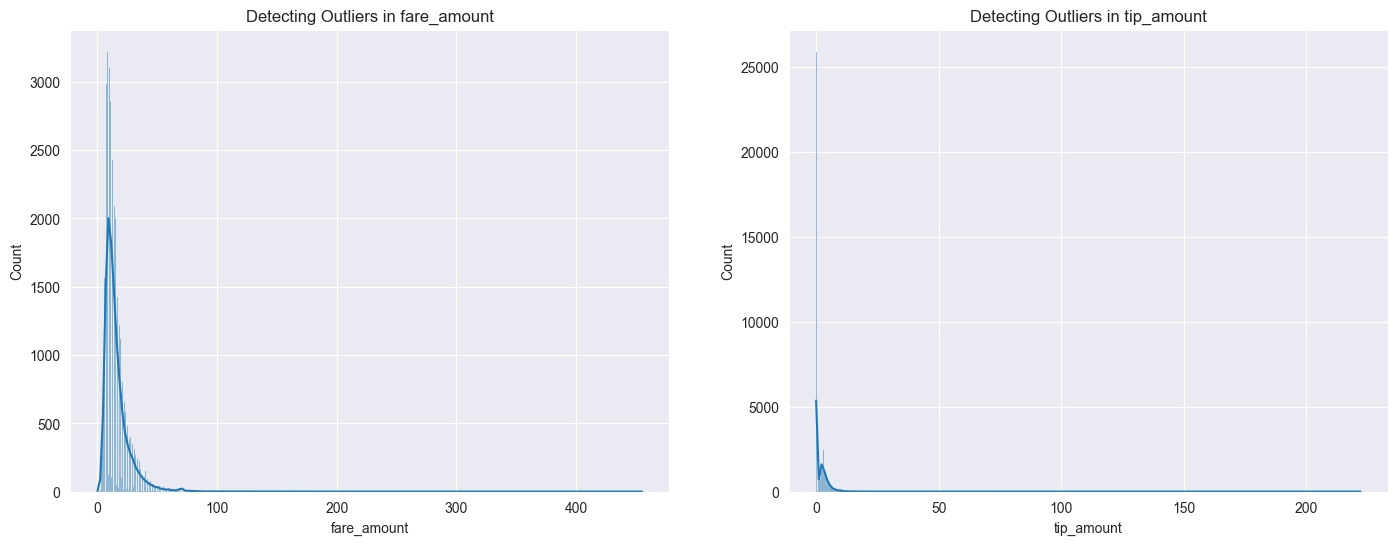

In [1051]:
# Menggunakan histogram untuk mengetahui penyebaran fare_amount dan tip_amount
plt.figure(figsize=(17,6))

plt.subplot(1,2,1)
sns.histplot(df_nyc['fare_amount'], kde=True)
plt.title('Detecting Outliers in fare_amount')

plt.subplot(1,2,2)
sns.histplot(df_nyc['tip_amount'], kde=True)
plt.title('Detecting Outliers in tip_amount')

terdapat outliers pada fare_amount dan tip_amount

Text(0.5, 1.0, 'Detecting Outliers in tip_amount')

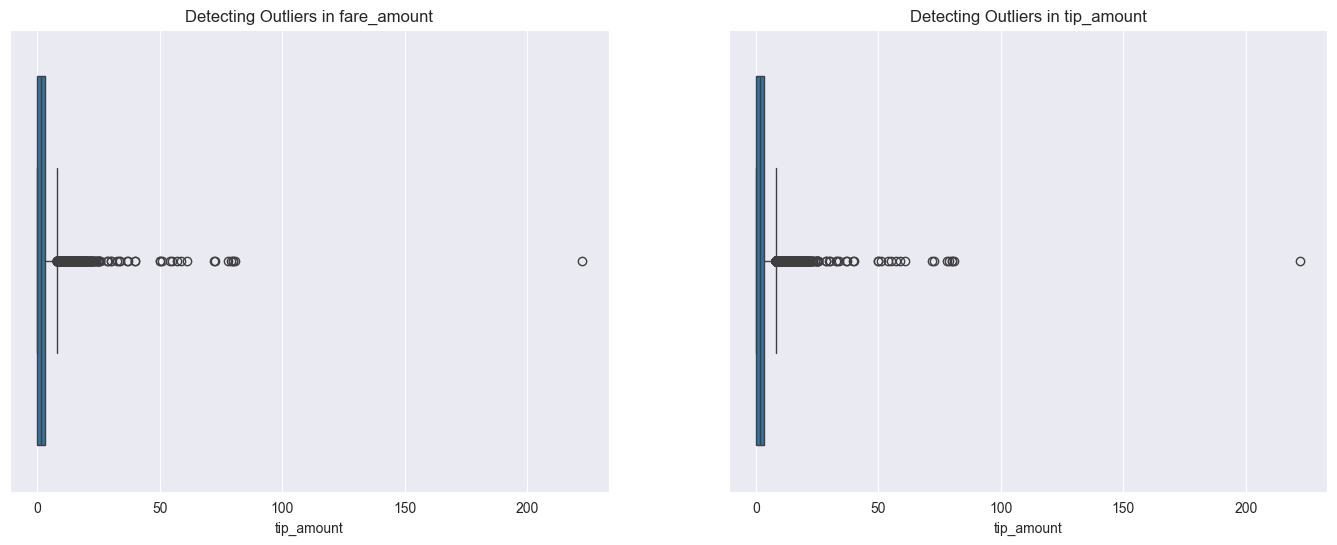

In [1052]:
# Melakukan pengecekan outliers pada fare_amount dan tip_amount menggunakan Box Plot
plt.figure(figsize=(17,6))

plt.subplot(1,2,1)
sns.boxplot(df_nyc, x = 'tip_amount')
plt.title('Detecting Outliers in fare_amount')

plt.subplot(1,2,2)
sns.boxplot(df_nyc, x = 'tip_amount')
plt.title('Detecting Outliers in tip_amount')

pada data fare_amount dan tip amount terdapat outlier pada upperbound

In [1053]:
Q1 = df_nyc[['fare_amount','tip_amount']].quantile(0.25)
Q3 = df_nyc[['fare_amount','tip_amount']].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print('Nilai Q1:', Q1)
print('Nilai Q3:', Q3)
print('Nilai IQR:', IQR)
print('Nilai lower:', lower_bound)
print('Nilai upper:', upper_bound)

Nilai Q1: fare_amount    9.3
tip_amount     0.0
Name: 0.25, dtype: float64
Nilai Q3: fare_amount    18.40
tip_amount      3.28
Name: 0.75, dtype: float64
Nilai IQR: fare_amount    9.10
tip_amount     3.28
dtype: float64
Nilai lower: fare_amount   -4.35
tip_amount    -4.92
dtype: float64
Nilai upper: fare_amount    32.05
tip_amount      8.20
dtype: float64


- batas upperbound pada fare_amount adalah 32.05, diatas nilai batas upperbound sudah dikatan sebagai outliers
- batas upperbound pada tip_amount adalah 8.0, diatas nilai batas upperbound sudah dikatan sebagai outliers

**Handling outliers pada fare_amount dan tip_amount menggunakan IQR**

In [1054]:
# menggunakan tanda bitwise not (~) untuk mengabil data yang tidak mengandung outliers.
df_clean = df_nyc[~((df_nyc[['fare_amount', 'tip_amount']] < lower_bound) | 
                   (df_nyc[['fare_amount', 'tip_amount']] > upper_bound)).any(axis=1)]
df_clean

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,pickup_borough,pickup_zone,dropoff_borough,dropoff_zone,date_pickup,PU_hours,duration_time,day_name
0,2023-01-01 00:26:10,2023-01-01 00:37:11,1,166,143,1,2.58,14.9,4.03,1,1,Manhattan,Morningside Heights,Manhattan,Lincoln Square West,2023-01-01,00,0 days 00:11:01,Sunday
1,2023-01-01 00:51:03,2023-01-01 00:57:49,1,24,43,1,1.81,10.7,2.64,1,1,Manhattan,Bloomingdale,Manhattan,Central Park,2023-01-01,00,0 days 00:06:46,Sunday
3,2023-01-01 00:13:14,2023-01-01 00:19:03,1,41,238,1,1.30,6.5,1.70,1,1,Manhattan,Central Harlem,Manhattan,Upper West Side North,2023-01-01,00,0 days 00:05:49,Sunday
4,2023-01-01 00:33:04,2023-01-01 00:39:02,1,41,74,1,1.10,6.0,0.00,1,1,Manhattan,Central Harlem,Manhattan,East Harlem North,2023-01-01,00,0 days 00:05:58,Sunday
5,2023-01-01 00:53:31,2023-01-01 01:11:04,1,41,262,1,2.78,17.7,0.00,2,1,Manhattan,Central Harlem,Manhattan,Yorkville East,2023-01-01,00,0 days 00:17:33,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63708,2023-01-31 23:09:22,2023-01-31 23:17:21,5,130,205,1,2.75,15.0,2.00,1,2,Queens,Jamaica,Queens,Saint Albans,2023-01-31,23,0 days 00:07:59,Tuesday
63709,2023-01-31 23:06:18,2023-01-31 23:17:03,1,65,181,1,2.44,13.5,3.20,1,1,Brooklyn,Downtown Brooklyn/MetroTech,Brooklyn,Park Slope,2023-01-31,23,0 days 00:10:45,Tuesday
63710,2023-01-31 23:17:03,2023-01-31 23:23:04,1,244,116,1,1.40,9.3,2.36,1,1,Manhattan,Washington Heights South,Manhattan,Hamilton Heights,2023-01-31,23,0 days 00:06:01,Tuesday
63711,2023-01-31 23:29:18,2023-01-31 23:38:50,1,74,238,1,2.47,13.5,3.75,1,1,Manhattan,East Harlem North,Manhattan,Upper West Side North,2023-01-31,23,0 days 00:09:32,Tuesday


Text(0.5, 1.0, 'Sesudah Outliers ditangani')

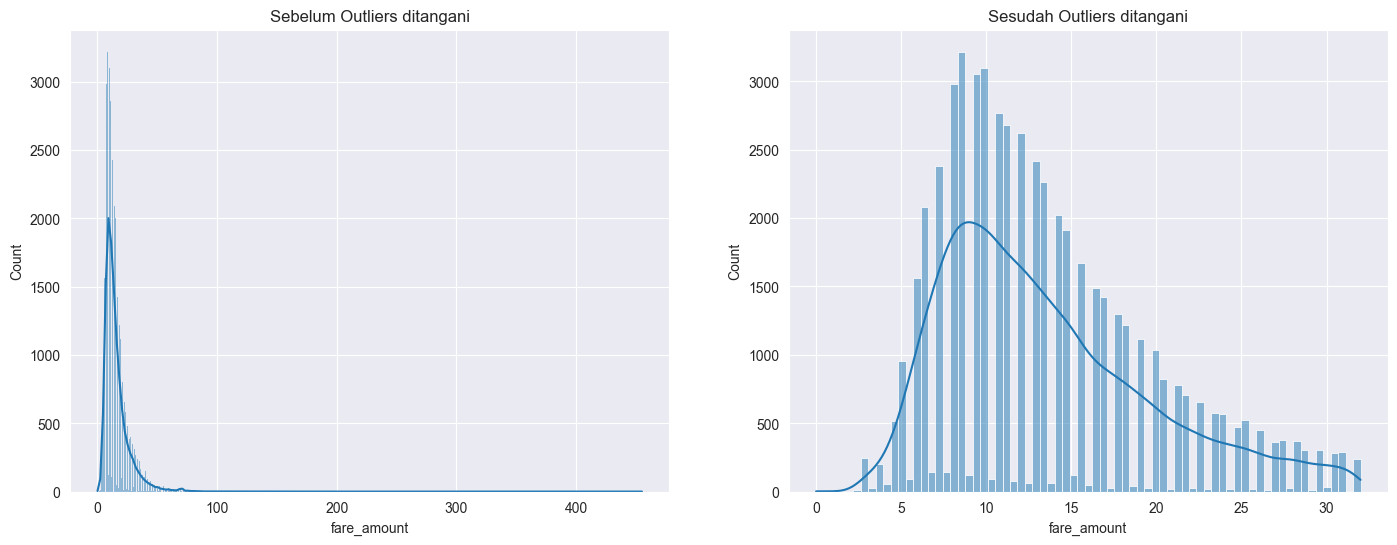

In [1055]:
# Membandingkan penyebaran data fare_amount sebelum dan sesudah outlier di handle
plt.figure(figsize=(17,6))

plt.subplot(1,2,1)
sns.histplot(df_nyc['fare_amount'], kde=True)
plt.title('Sebelum Outliers ditangani')

plt.subplot(1,2,2)
sns.histplot(df_clean['fare_amount'], kde=True)
plt.title('Sesudah Outliers ditangani')

Text(0.5, 1.0, 'Sesudah Outliers ditangani')

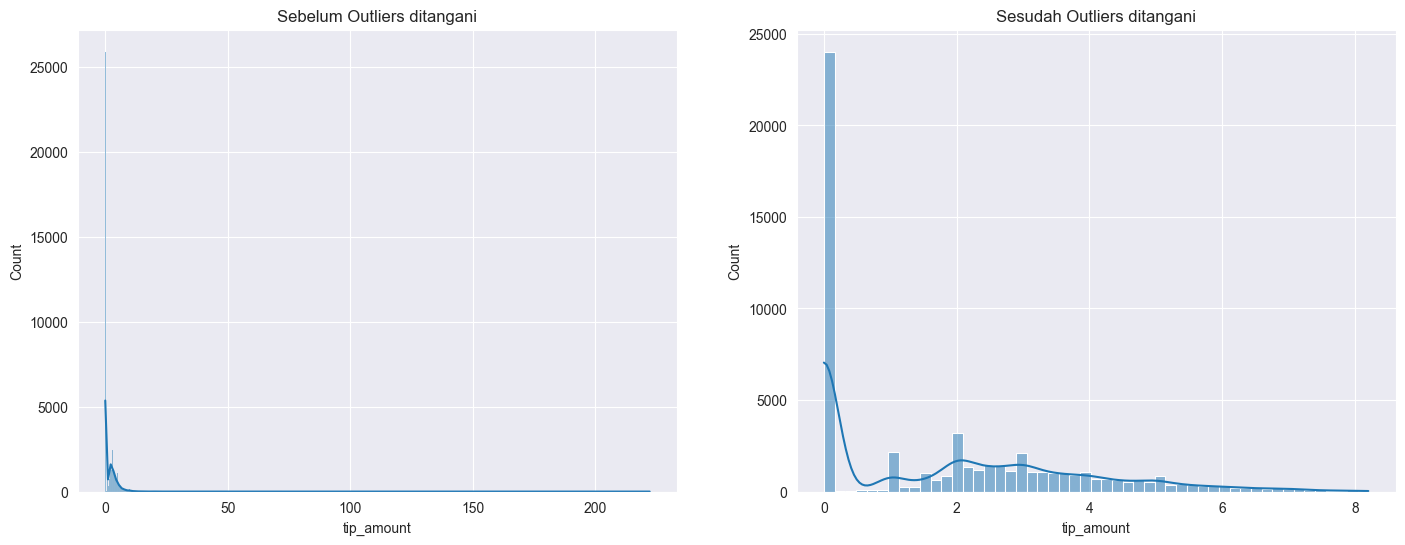

In [1056]:
# Membandingkan penyebaran data tip_amount sebelum dan sesudah outlier di handle
plt.figure(figsize=(17,6))

plt.subplot(1,2,1)
sns.histplot(df_nyc['tip_amount'], kde=True)
plt.title('Sebelum Outliers ditangani')

plt.subplot(1,2,2)
sns.histplot(df_clean['tip_amount'], kde=True)
plt.title('Sesudah Outliers ditangani')

Text(0.5, 1.0, 'Sesudah Outliers ditangani')

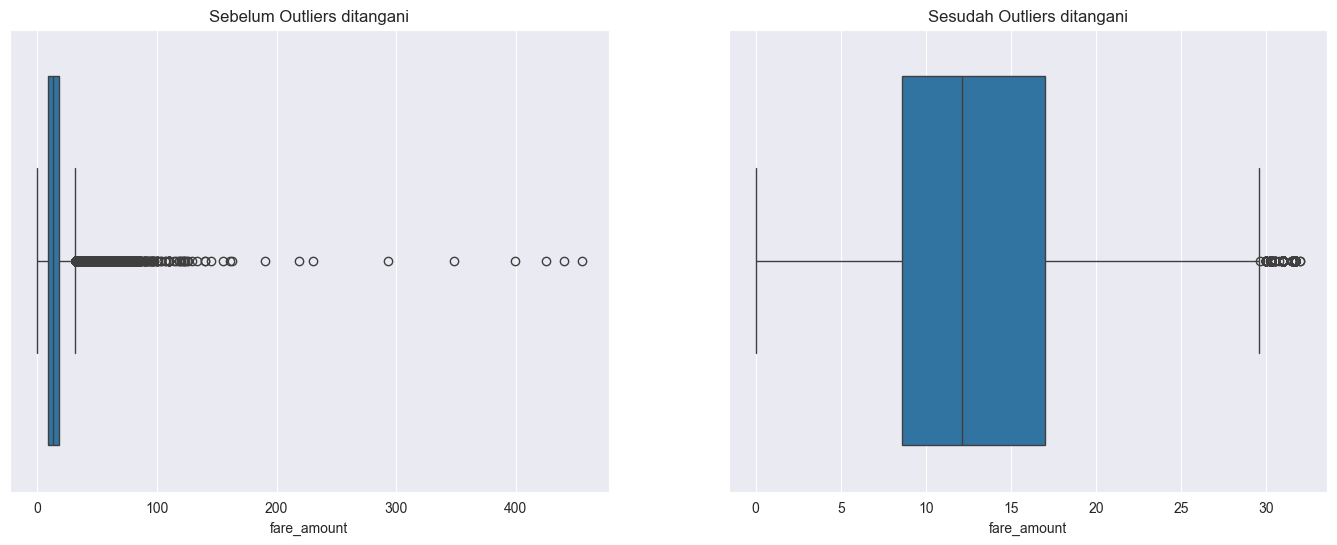

In [1057]:
# Membandingkan box plot pada fare_amount sebelum dan sesudah outlier di handle
plt.figure(figsize=(17,6))

plt.subplot(1,2,1)
sns.boxplot(df_nyc, x = 'fare_amount')
plt.title('Sebelum Outliers ditangani')

plt.subplot(1,2,2)
sns.boxplot(df_clean, x = 'fare_amount')
plt.title('Sesudah Outliers ditangani')


Text(0.5, 1.0, 'Sesudah Outliers ditangani')

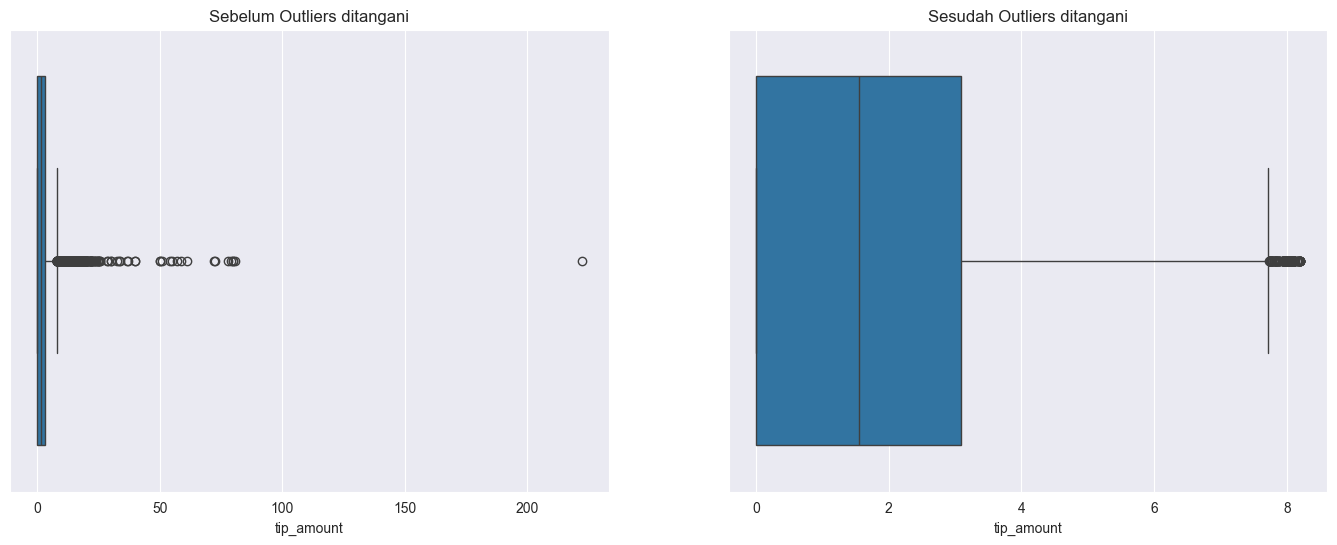

In [1058]:
# Membandingkan box plot pada tip_amount sebelum dan sesudah outlier di handle
plt.figure(figsize=(17,6))

plt.subplot(1,2,1)
sns.boxplot(df_nyc, x = 'tip_amount')
plt.title('Sebelum Outliers ditangani')

plt.subplot(1,2,2)
sns.boxplot(df_clean, x = 'tip_amount')
plt.title('Sesudah Outliers ditangani')

In [1059]:
# mengecek nilai mean dan median sebelum dan sesudah outlier ditangani pada fare_amount

# sebelum outlier di take out
mean_with_outliers = df_nyc['fare_amount'].mean()
median_with_outliers = df_nyc['fare_amount'].median()

# sesudah outliers di take out
mean_clean = df_clean['fare_amount'].mean()
median_clean = df_clean['fare_amount'].median()


print('Nilai mean sebelum outliers di take out:', mean_with_outliers)
print('Nilai median sebelum outliers di take out:', median_with_outliers)

print('Nilai mean sesudah outliers di take out:', mean_clean)
print('Nilai median sesudah outliers di take out:', median_clean)

Nilai mean sebelum outliers di take out: 15.742942406986204
Nilai median sebelum outliers di take out: 12.8
Nilai mean sesudah outliers di take out: 13.449753130783193
Nilai median sesudah outliers di take out: 12.1


jarak mean dan median sudah berkurang setelah outliers di handling pada fare_amount

In [1060]:
# mengecek nilai mean dan median sebelum dan sesudah outlier ditangani pada tip amount

# sebelum outlier di take out
mean_with_outliers = df_nyc['tip_amount'].mean()
median_with_outliers = df_nyc['tip_amount'].median()

# sesudah outliers di take out
mean_clean = df_clean['tip_amount'].mean()
median_clean = df_clean['tip_amount'].median()


print('Nilai mean sebelum outliers di take out:', mean_with_outliers)
print('Nilai median sebelum outliers di take out:', median_with_outliers)

print('Nilai mean sesudah outliers di take out:', mean_clean)
print('Nilai median sesudah outliers di take out:', median_clean)

Nilai mean sebelum outliers di take out: 2.098118307240217
Nilai median sebelum outliers di take out: 1.66
Nilai mean sesudah outliers di take out: 1.8099622688969936
Nilai median sesudah outliers di take out: 1.56


jarak mean dan median sudah berkurang setelah outliers di handling pada tip_amount

In [1061]:
df_clean.shape

(55657, 19)

In [1062]:
df_clean

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,pickup_borough,pickup_zone,dropoff_borough,dropoff_zone,date_pickup,PU_hours,duration_time,day_name
0,2023-01-01 00:26:10,2023-01-01 00:37:11,1,166,143,1,2.58,14.9,4.03,1,1,Manhattan,Morningside Heights,Manhattan,Lincoln Square West,2023-01-01,00,0 days 00:11:01,Sunday
1,2023-01-01 00:51:03,2023-01-01 00:57:49,1,24,43,1,1.81,10.7,2.64,1,1,Manhattan,Bloomingdale,Manhattan,Central Park,2023-01-01,00,0 days 00:06:46,Sunday
3,2023-01-01 00:13:14,2023-01-01 00:19:03,1,41,238,1,1.30,6.5,1.70,1,1,Manhattan,Central Harlem,Manhattan,Upper West Side North,2023-01-01,00,0 days 00:05:49,Sunday
4,2023-01-01 00:33:04,2023-01-01 00:39:02,1,41,74,1,1.10,6.0,0.00,1,1,Manhattan,Central Harlem,Manhattan,East Harlem North,2023-01-01,00,0 days 00:05:58,Sunday
5,2023-01-01 00:53:31,2023-01-01 01:11:04,1,41,262,1,2.78,17.7,0.00,2,1,Manhattan,Central Harlem,Manhattan,Yorkville East,2023-01-01,00,0 days 00:17:33,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63708,2023-01-31 23:09:22,2023-01-31 23:17:21,5,130,205,1,2.75,15.0,2.00,1,2,Queens,Jamaica,Queens,Saint Albans,2023-01-31,23,0 days 00:07:59,Tuesday
63709,2023-01-31 23:06:18,2023-01-31 23:17:03,1,65,181,1,2.44,13.5,3.20,1,1,Brooklyn,Downtown Brooklyn/MetroTech,Brooklyn,Park Slope,2023-01-31,23,0 days 00:10:45,Tuesday
63710,2023-01-31 23:17:03,2023-01-31 23:23:04,1,244,116,1,1.40,9.3,2.36,1,1,Manhattan,Washington Heights South,Manhattan,Hamilton Heights,2023-01-31,23,0 days 00:06:01,Tuesday
63711,2023-01-31 23:29:18,2023-01-31 23:38:50,1,74,238,1,2.47,13.5,3.75,1,1,Manhattan,East Harlem North,Manhattan,Upper West Side North,2023-01-31,23,0 days 00:09:32,Tuesday


In [1063]:
# Cek anomali
# Berdasarkan data trip_distance masih terdapat nilai 0.01 mil (0.0161 kilometer/16.0934 meter)
# tidak mungkin terjadi perjalan taxi di jarak ini karena terlalu dekat
# kita ambil asumsi perjalanan yang bisa dicapai jalan kaki adalah sampai denga 0.06 mil (0.1 kilometer/100 meter)
# diantara jarak perjalanan ini bahkan ada yang memiliki total_amount yang besar. seperti data dibawah
# Sehingga kita akan menghapus perjalanan antara 0.01 - 0.06 karena dianggap anomaly
outliers_distance = df_clean[df_clean['trip_distance'] < 0.07]
outliers_distance

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,pickup_borough,pickup_zone,dropoff_borough,dropoff_zone,date_pickup,PU_hours,duration_time,day_name
146,2023-01-01 02:03:52,2023-01-01 02:03:57,1,169,169,2,0.01,3.00,0.00,2,1,Bronx,Mount Hope,Bronx,Mount Hope,2023-01-01,02,0 days 00:00:05,Sunday
214,2023-01-01 03:11:03,2023-01-01 03:11:09,5,61,61,2,0.04,30.00,1.00,1,2,Brooklyn,Crown Heights North,Brooklyn,Crown Heights North,2023-01-01,03,0 days 00:00:06,Sunday
342,2023-01-01 08:48:40,2023-01-01 08:48:49,5,223,223,2,0.02,28.65,7.41,1,2,Queens,Steinway,Queens,Steinway,2023-01-01,08,0 days 00:00:09,Sunday
650,2023-01-01 14:28:59,2023-01-01 14:29:06,5,92,92,2,0.01,15.00,0.00,1,2,Queens,Flushing,Queens,Flushing,2023-01-01,14,0 days 00:00:07,Sunday
910,2023-01-01 17:20:29,2023-01-01 17:21:33,1,74,74,1,0.01,3.70,0.00,2,1,Manhattan,East Harlem North,Manhattan,East Harlem North,2023-01-01,17,0 days 00:01:04,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62913,2023-01-31 17:11:49,2023-01-31 17:11:54,5,130,130,1,0.02,20.00,0.00,2,2,Queens,Jamaica,Queens,Jamaica,2023-01-31,17,0 days 00:00:05,Tuesday
62945,2023-01-31 17:15:23,2023-01-31 17:16:04,1,74,74,6,0.05,3.00,0.00,2,1,Manhattan,East Harlem North,Manhattan,East Harlem North,2023-01-31,17,0 days 00:00:41,Tuesday
63027,2023-01-31 17:56:23,2023-01-31 17:57:25,5,82,82,1,0.03,15.00,0.00,1,2,Queens,Elmhurst,Queens,Elmhurst,2023-01-31,17,0 days 00:01:02,Tuesday
63051,2023-01-31 17:55:20,2023-01-31 17:55:55,1,42,42,1,0.03,3.00,0.00,2,1,Manhattan,Central Harlem North,Manhattan,Central Harlem North,2023-01-31,17,0 days 00:00:35,Tuesday


In [1064]:
# Simpan index outliers_time pada list
outliers_distance.index
index_list = outliers_distance.index.tolist()

In [1065]:
# Menghapus baris dengan indeks yang ada di dalam list
df_clean.drop(index_list, inplace=True)

In [1066]:
df_clean.shape

(55432, 19)

In [1067]:
# Melakukan reset_index
df_clean.reset_index(inplace=True)

In [1068]:
# Menghapus nama kolom index
df_clean.drop(columns='index',inplace=True)

In [1069]:
# mengecek sekali lagi nilai duplicate agar bisa dilakukan analisa
df_clean.duplicated().sum()

np.int64(0)

In [1070]:
df_clean.to_excel('TLC_clean.xlsx')

## **Analisa**

**How to Solve The Problem**

- Menganalisa lebih dalam elemen - elemen penting terkait rekamanan perjalanan seperti:
1. Memahami variasi perjalanan dari segi waktu, unit administratif (Borough) dan zona kecil (zone) serta rata2 durasi perjalanan yang dilakukan oleh pelanggan.
2. Melihat Pola pendapatan dan banyaknya pesanan di setiap borough dan zone.
3. Melihat Pola tip yang diberikan oleh pelanggan.
4. Meliha pola tipe pembayaran yang dilakukan pelanggan,

- elemen - elemen tersebut akan menghasilkan insight/wawasan yang kemudian akan disampaikan kepada stakeholder. Insightnya seperti berikut:
1. Mengoptimalkan pendistribusian armada berdasarkan Pola pemesanan pelanggan. Hal ini bertujuan meningkatkan efisiensi biaya operasional.
2. Mengidentifikasi peluang pendapatan terbesar berdasarkan wilayah, zona dan waktu, sehingga dapat memaksimalkan pendapatan.
3. Mengidentifikasi peluang - peluang yang memungkinkan pelanggan untuk memberikan tip.

**Avg Fare_Amount dan Total Perjalanan Berdasarkan Waktu**

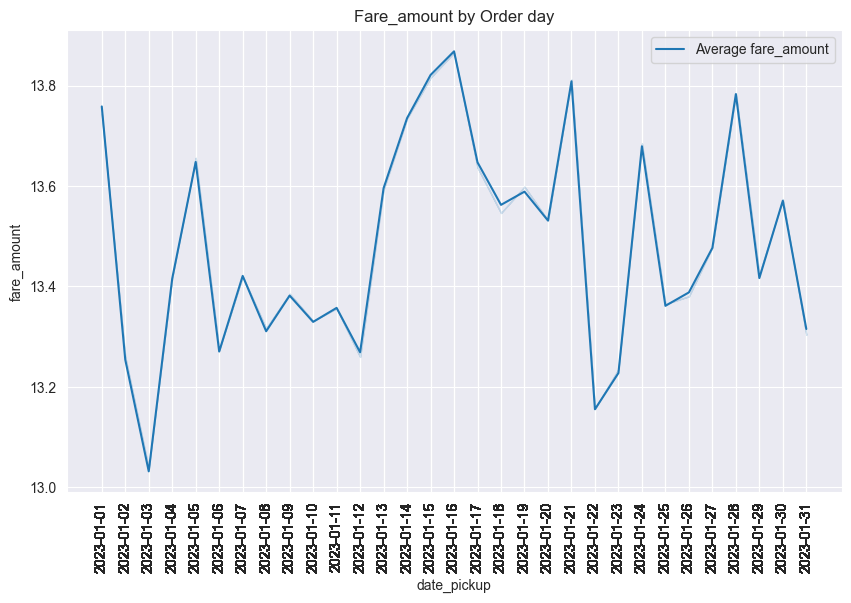

In [1071]:
fare = df_clean[['date_pickup', 'fare_amount']]

plt.figure(figsize=(10,6))
# Menampilkan line plot
sns.lineplot(data = fare,
             x = 'date_pickup',
             y = 'fare_amount',
             ci = 0,
             label = 'Average fare_amount')

# Mengatur posisi xticks
plt.xticks(ticks= fare['date_pickup'],
           rotation = (90))

plt.title('Fare_amount by Order day')

plt.show()

insight:
- terjadi fluktuatif fare_amount sepanjan bulan juni 2023
- rata-rata fare_amount tertinggi terjadi pada 16 januari 2023
- rata-rata fare_amount terendah terjadi pada 3 januari 2023

In [1072]:
# Membuat data perjalanan pada bulan januari 2023 pada variabel trip_dom (Date of Month)
trip_dom = df_clean.groupby(df_clean['date_pickup'].dt.date).agg(trip_bydate=('date_pickup', 'count')).reset_index()
trip_dom['date_pickup'] = pd.to_datetime(trip_dom['date_pickup'])
trip_dom['day_of_week'] = trip_dom['date_pickup'].dt.day_name()

# Membuat data perjalanan dalam days of week pada bulan januari 2023 untuk melihat distribusi penyabaran
# perjalanan dari senin sampai dengan minggu pada variabel trip_dow (Day of Week)
trip_dow = trip_dom.groupby('day_of_week').agg(trip_byday=('trip_bydate', 'sum'), day_count=('day_of_week', 'count'), avg_trip=('trip_bydate', 'mean')).reset_index()
total = trip_dow['trip_byday'].sum()
trip_dow['percentage'] = trip_dow['trip_byday'] / total * 100

trip = pd.merge(trip_dom, trip_dow, on='day_of_week', how='left')

In [1073]:
df_clean['pickup_borough'].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

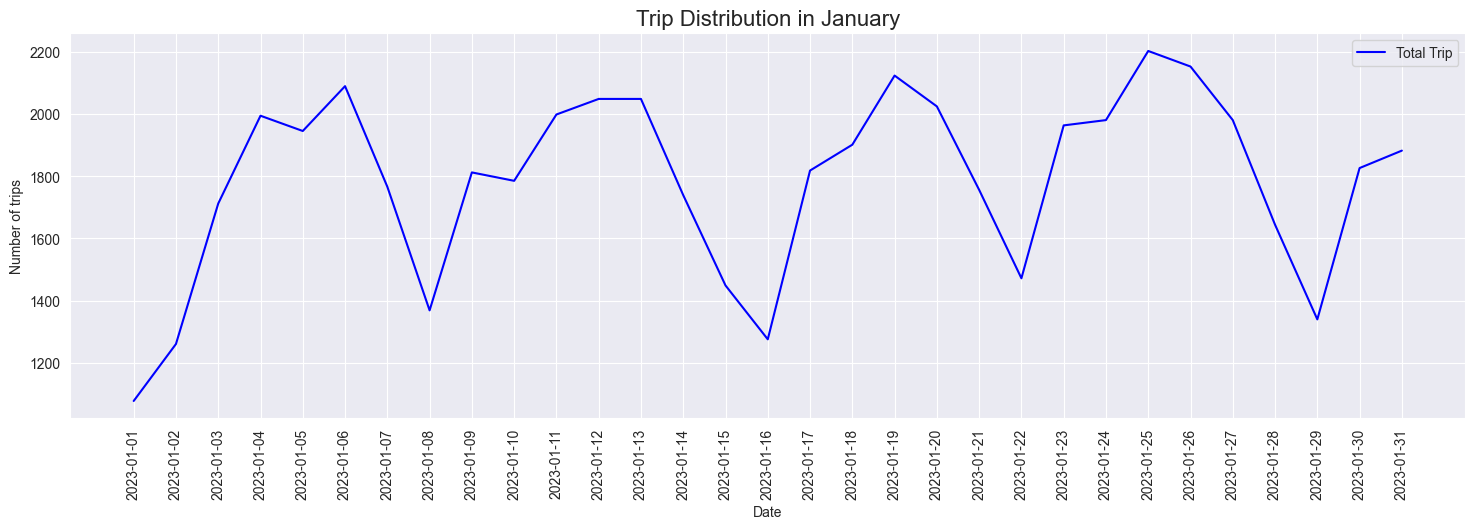

In [1074]:

plt.figure(figsize=(18,5))
sns.set_style('darkgrid')
sns.lineplot(data=trip,
             x='date_pickup', 
             y='trip_bydate', 
             color='blue',
             label = 'Total Trip')

plt.title('Trip Distribution in January', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of trips')
plt.xticks(trip_dom['date_pickup'], rotation=90)
plt.show()

insight:
- Terjadi fluktuatif perjalanan pada bulan januari 2023
- Perjalanan tertinggi terjadi pada tanggal 25 januari 2023
- Perjalanan terendah terjadi pada tangal 1 januari 2023

**Distribusi Perjalanan Berdasarkan Hari**

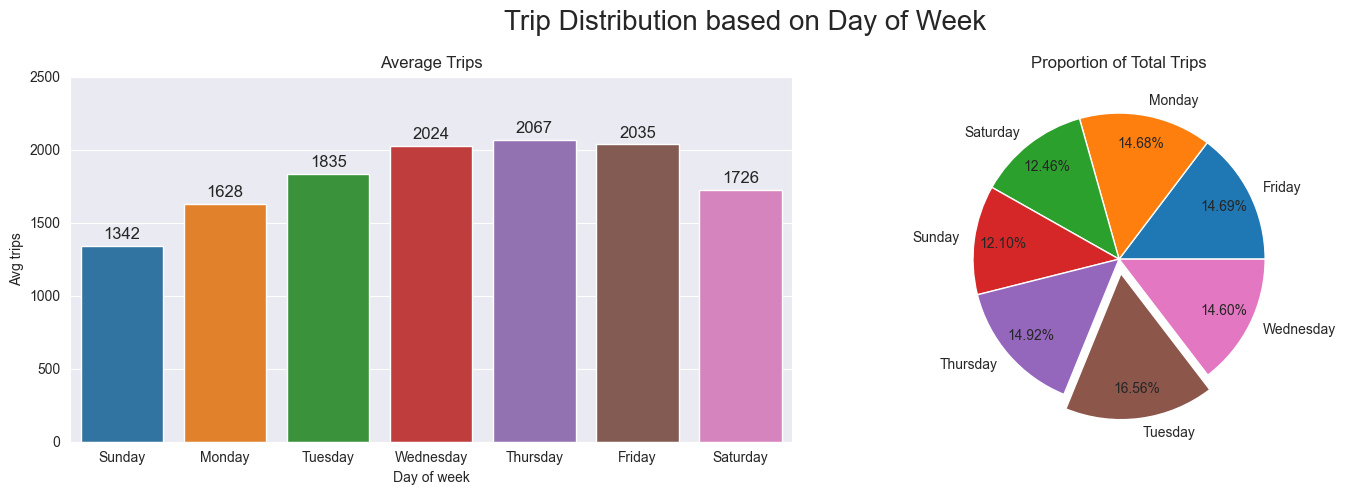

In [1075]:
plt.figure(figsize=(15,5))

plt.suptitle('Trip Distribution based on Day of Week', fontsize=20)
plt.subplot(1,2,1)
plots = sns.barplot(data = trip,
            x='day_of_week', 
            y='avg_trip',
            ci = 0,
            palette='tab10')

for bar in plots.patches:
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.title('Average Trips')
plt.xlabel('Day of week')
plt.ylabel('Avg trips')
plt.yticks(np.arange(0, 2501, 500))

plt.subplot(1,2,2)
plt.pie( x = trip_dow['percentage'],
        labels = trip_dow['day_of_week'],
        pctdistance=0.8, 
        autopct='%1.2f%%', 
        explode=(0,0,0,0,0,0.1,0))
plt.title('Proportion of Total Trips')

plt.tight_layout()
plt.show()

In [1076]:
# Melihat nilai borough yang paling banyak terjadi perjalanan
borough = df_clean.groupby('pickup_borough').agg(total_perjalanan=('pickup_borough', 'count')).sort_values(by='total_perjalanan', ascending=False).reset_index()
borough_trip = df_clean.groupby('pickup_borough').agg(total_perjalanan=('pickup_borough', 'count')).sort_values(by='total_perjalanan', ascending=False).reset_index()
borough_fare = df_clean.groupby('pickup_borough')[['fare_amount']].sum().sort_values(by='fare_amount', ascending=False).reset_index()

Insight:
- Selama bulan januari, hari kamis memiliki rata-rata perjalanan yang paling tinggi sebesar 2096.
- Proporsi Total perjalanan terbesar berapa pada hari selasa dengan prosentase 16.56% 
- Minggu menjadi jumlah perjalanan terendah dengan rata-rata perjalanan hanya 1358 dengan kontribusi proporsi dari total perjalanan 12.07 %. Asumsi nya pada hari minggu, banyak pekerja yang libur dan beristirahat di rumah untuk memprsiapkan diri bekerja pada hari senin. 

**Borough Performance Based on Total Trip & Fare Amount**

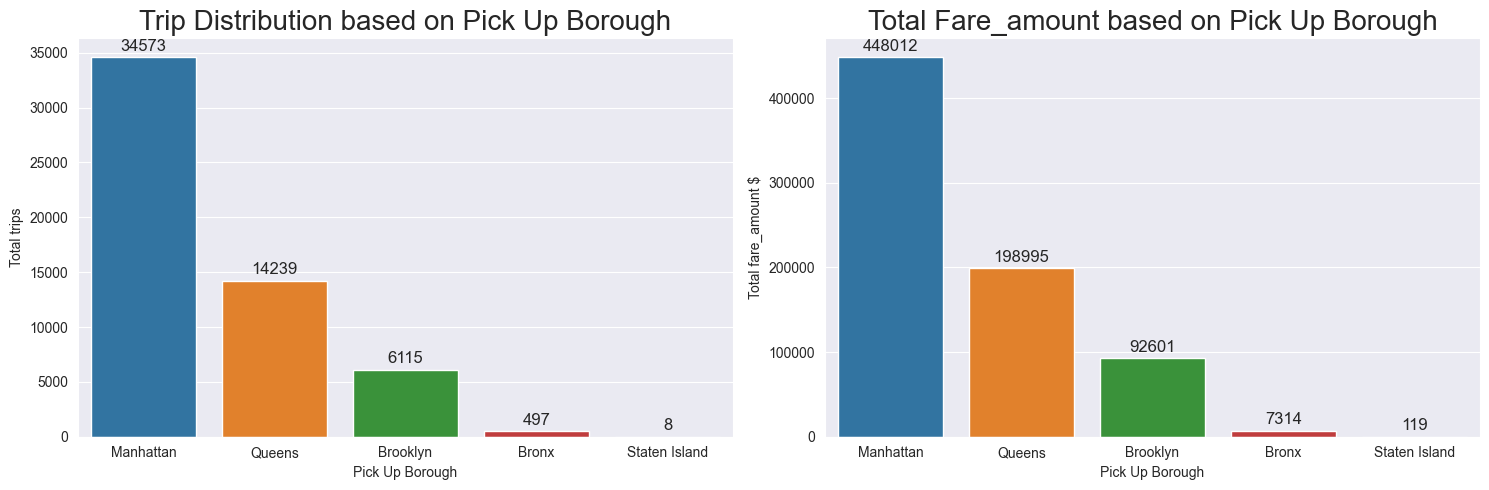

In [1077]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plots = sns.barplot(data = borough_trip,
            x='pickup_borough', 
            y='total_perjalanan',
            ci = 0,
            palette='tab10')

for bar in plots.patches:
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
    
plt.title('Trip Distribution based on Pick Up Borough', fontsize=20)   
plt.xlabel('Pick Up Borough')
plt.ylabel('Total trips')



plt.subplot(1,2,2)
plots = sns.barplot(data = borough_fare,
            x='pickup_borough', 
            y='fare_amount',
            ci = 0,
            palette='tab10',
            estimator= 'sum')

for bar in plots.patches:
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
    
plt.title('Total Fare_amount based on Pick Up Borough', fontsize=20)    
plt.xlabel('Pick Up Borough')
plt.ylabel('Total fare_amount $')

plt.tight_layout()
plt.show()

insight :
- Total perjalanan dan fare_amount tertinggi oleh customer terjadi pada wilayah manhattan sebanyak 34479 perjalanan dengan total fare amount sebesar 445821 dollar , kemudian diikuti oleh wilayah queens sebanyak 14219 perjalanan dengan total fare amount sebesar 198495 dollar, Urutan ke 3 ada pada wilayah brooklyn dengan total perjalanan sebanyak 6095 dengan total fare amount sebesar 92081 dollar, kemudian diikuti oleh wilayah bronx dengan total perjalanan sebanyak 497 perjalanan dengan total fare amount sebesar  7314 dollar, dan diposisi terakhir adalah staten island dengan total perjalanan hanya 8 perjalanan dan total fare amount sebesar 119 dollar.  


**Total Trip by Hours and Days**

In [1078]:
# Mengetahui frekuensi perjalanan dalam jam dan hari pada Bulan Juni 2023
day_trip_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
cross = pd.crosstab(index=df_clean['lpep_pickup_datetime'].dt.day_name(), columns=df_clean['lpep_pickup_datetime'].dt.hour, margins=True).reindex(day_trip_order)
cross.columns.name = None
cross.index.name = 'Day of Week'
melted_cross = cross.iloc[:,:-1].reset_index().melt(id_vars='Day of Week', var_name='hour', value_name='trips')
cross

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,All
Day of Week,,,,,,,,,,,,,,,,,,,,,
Sunday,223,221,168,141,111,51,43,81,110,199,...,518,521,471,479,418,349,275,181,143,6708
Monday,104,59,36,58,33,34,103,340,366,429,...,653,663,655,665,534,362,283,196,130,8138
Tuesday,79,46,37,31,15,37,165,481,572,557,...,667,743,724,739,611,450,315,229,147,9177
Wednesday,79,55,24,22,14,34,136,368,457,467,...,610,657,686,708,590,407,262,206,136,8095
Thursday,82,61,42,26,27,40,129,370,433,482,...,615,634,725,744,534,424,281,221,157,8268
Friday,128,74,35,27,21,30,113,369,409,407,...,655,663,660,658,533,403,295,262,232,8141
Saturday,188,159,107,88,64,35,37,99,160,221,...,571,532,458,489,441,380,301,263,267,6905


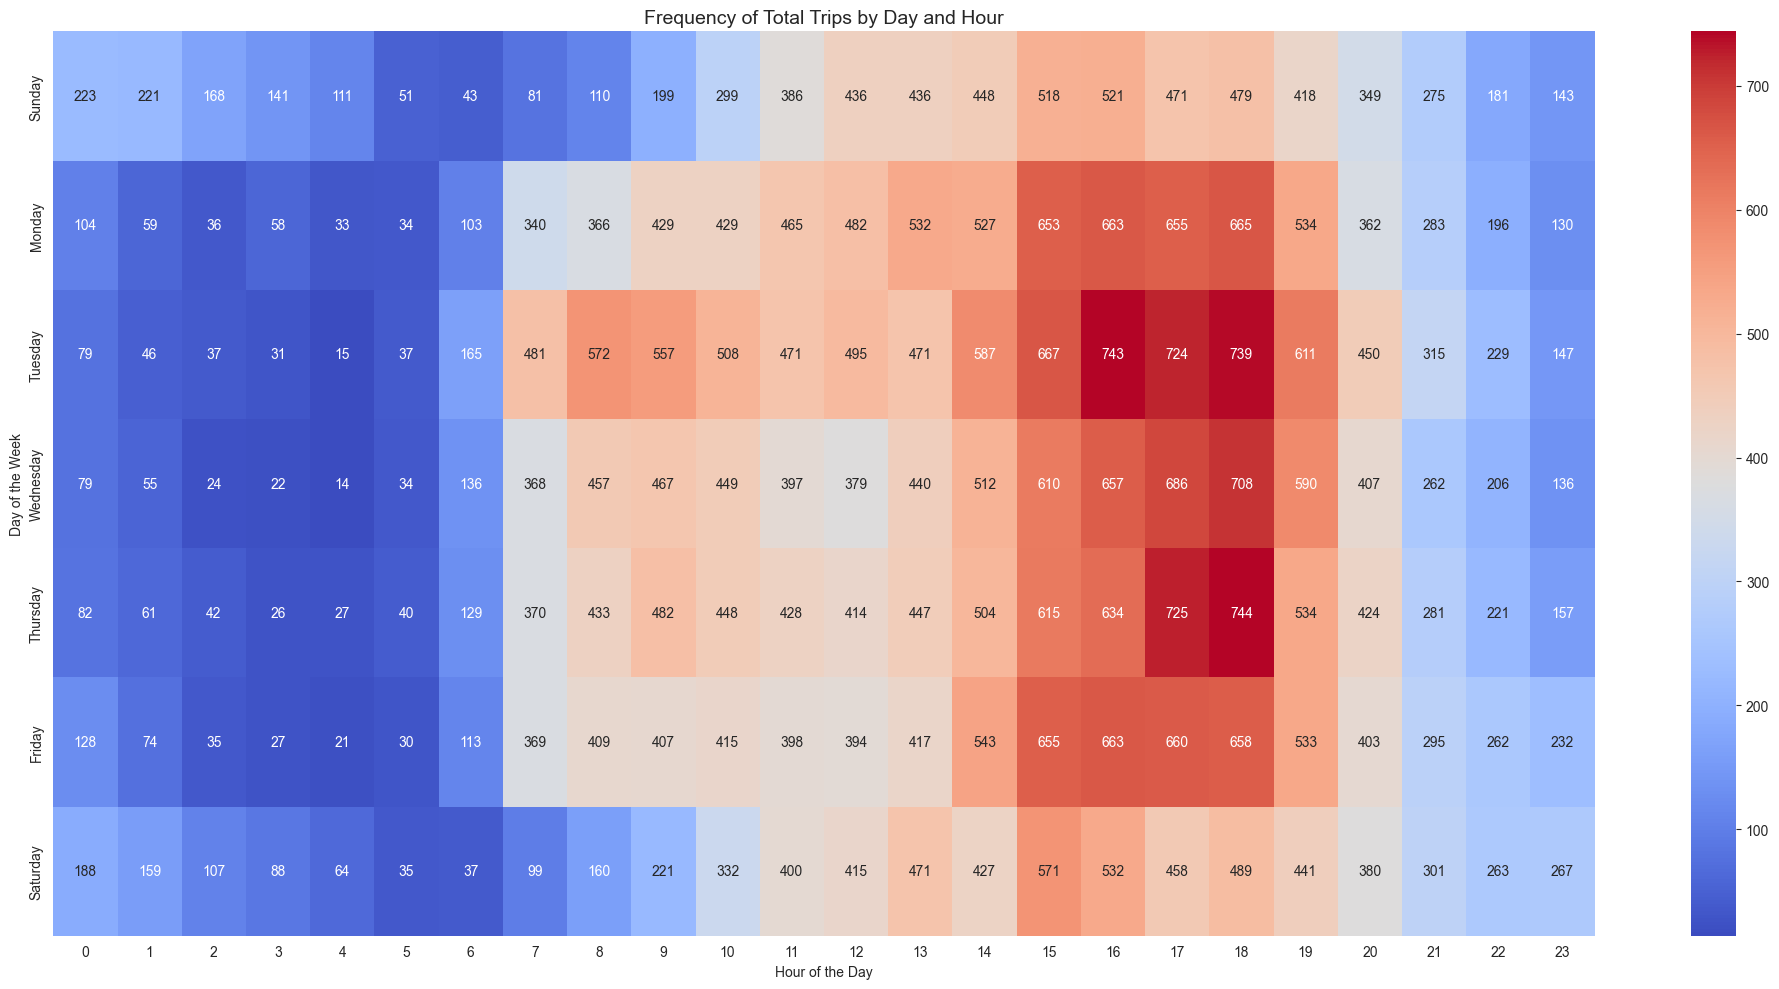

In [1079]:
plt.figure(figsize=(20,10))
sns.heatmap(cross.iloc[:,:-1], cmap="coolwarm", annot=True, fmt='d')
plt.title('Frequency of Total Trips by Day and Hour', fontsize=14)
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')

plt.tight_layout()
plt.show()

insinght:
- pada dini hari (0am - 6 am) : jumlah perjalanan mengalami fluktuatif. Mulai dari pukul 0 am kemudian menurun secara bertahap samapi dengan pukul 5 am dan naik signifikan pada pukul 6 am pagi.
- pada pagi hari (6am - 10 am) : pada jam 6 am - 10am terjadi peningkatan jumlah perjalanan secara konsisten.
- pada siang hari (10am - 14pm) jumlah perjalanan cenderung flat.
- pada sore hari ke malam pada pukul (15pm - 19 pm), jumlah perjalanan naik secara signifikan. 
- pada malam hari (19pm - 11pm) jumlah perjalanan menurun kembali secara bertahap.

- Pada weekdays (hari kerja), peak hours tertinggi terjadi pada sore - malam pada pukul (15pm - 19pm)
- Perjalanan tertinggi terjadi pada hari selasa pukul 16pm.
- Perjalanan terendah terjadi pada hari rabu pukul 4am.


In [1080]:
pd.pivot_table(df_clean,
               index = 'pickup_borough',
               columns = 'PU_hours',
               values = 'trip_type',
               aggfunc = 'count')

PU_hours,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
pickup_borough,,,,,,,,,,,,,,,,,,,,,
Bronx,16.0,9.0,9.0,5.0,6.0,4.0,NaN,10.0,15.0,17.0,...,40.0,32.0,37.0,26.0,32.0,37.0,32.0,20.0,13.0,15.0
Brooklyn,159.0,164.0,134.0,78.0,64.0,17.0,19.0,33.0,83.0,141.0,...,349.0,462.0,463.0,511.0,549.0,514.0,469.0,348.0,235.0,194.0
Manhattan,259.0,176.0,97.0,56.0,34.0,117.0,620.0,1814.0,2081.0,2219.0,...,2367.0,2778.0,2763.0,2597.0,2537.0,1988.0,1415.0,983.0,703.0,510.0
Queens,449.0,326.0,209.0,253.0,181.0,123.0,87.0,251.0,327.0,384.0,...,790.0,1017.0,1149.0,1244.0,1363.0,1122.0,859.0,661.0,607.0,493.0
Staten Island,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,...,2.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN


**Total Trip Of Borough by Hours**

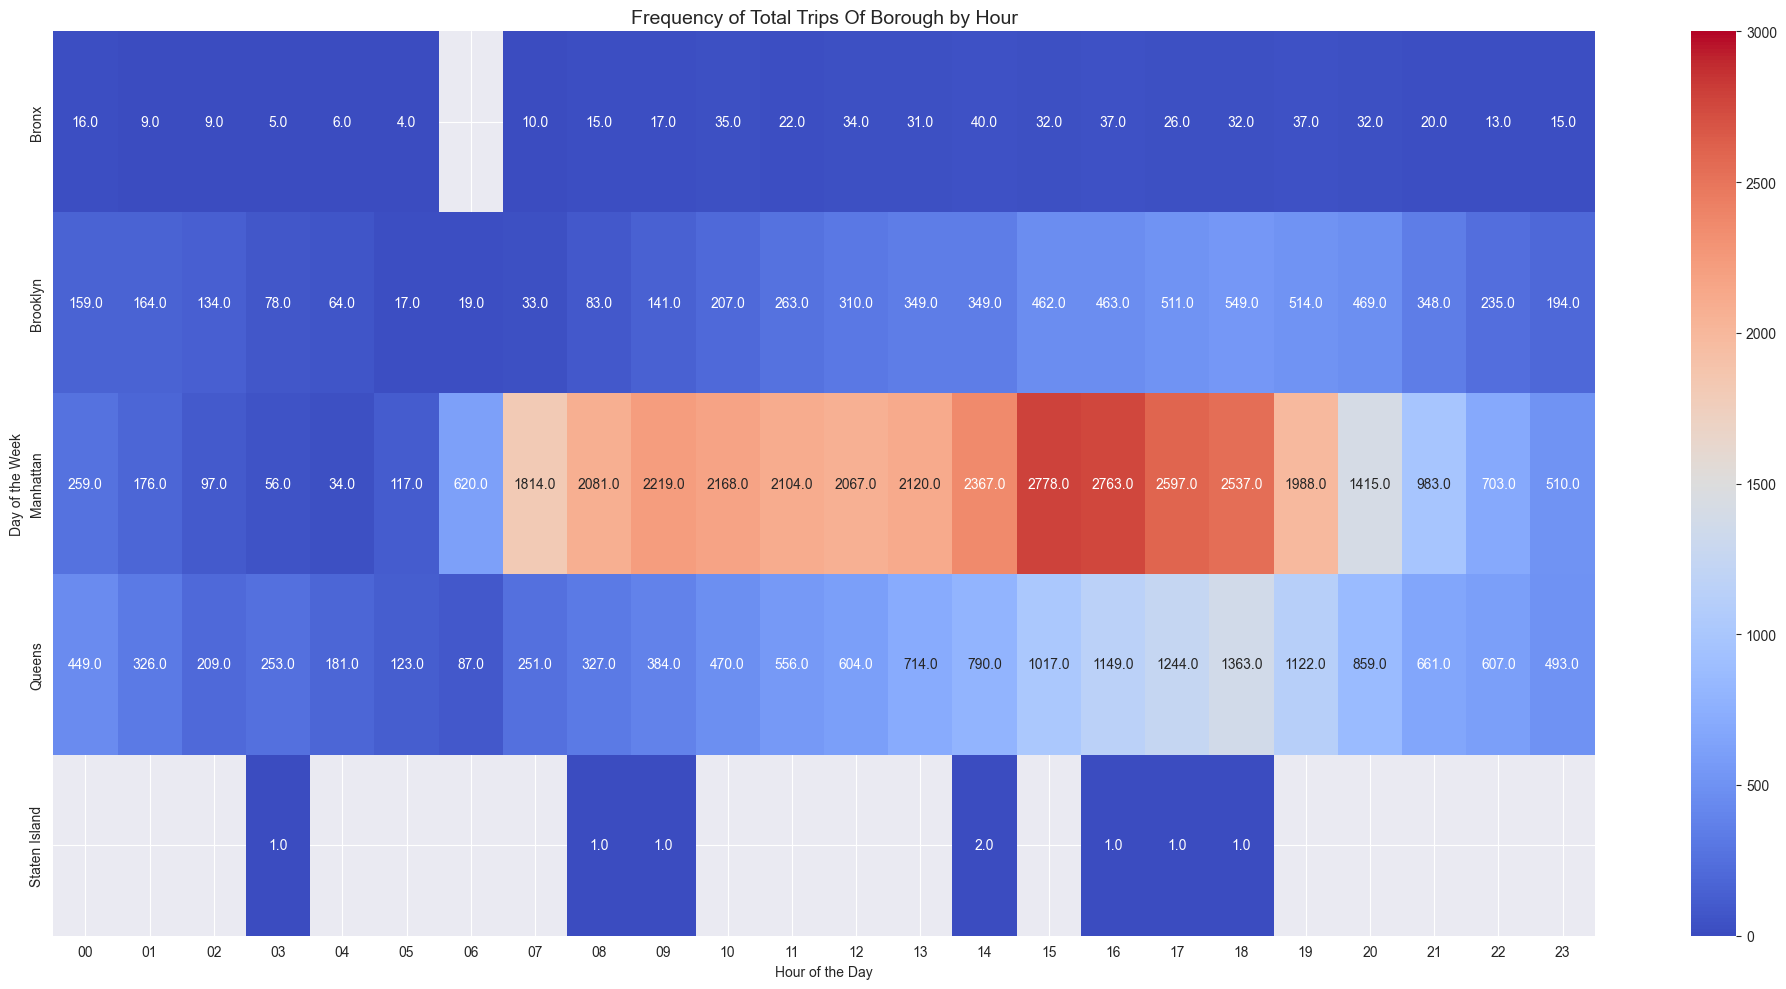

In [1081]:
plt.figure(figsize=(20,10))
sns.heatmap(pd.pivot_table(df_clean,
               index = 'pickup_borough',
               columns = 'PU_hours',
               values = 'trip_type',
               aggfunc = 'count'), cmap="coolwarm", annot=True, fmt='.1f',vmin=0, vmax=3000)
plt.title('Frequency of Total Trips Of Borough by Hour', fontsize=14)
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')

plt.tight_layout()
plt.show()

insight:
- Pada Manhattan borough, peak hours mulai terjadi pada pukul 8am - 18pm.
- Pada Queens borough, peak hours terjadi pada pukul 15pm - 19pm.
- Pada Brooklyn borough, peak hours terjadi pada 15pm - 20pm.
- Pada Bronx borough, peak hours terjadi pada 14pm - 20pm.
- Pada staten Island, pemesanan masih sangat rendah dan cenderung tidak ada pada jam tertentu.

**Top 5 Route in each Borough**

In [1082]:
trip_amount= df_clean.groupby(['pickup_borough','dropoff_borough','pickup_zone', 'dropoff_zone']).agg(trip_count=('pickup_zone', 'count'),
                                                        total_fare=('fare_amount', 'sum'), 
                                                        avg_fare=('fare_amount', 'mean'),
                                                        total_tip=('tip_amount', 'sum'), 
                                                        avg_tip=('tip_amount', 'mean')).reset_index().sort_values(by=['trip_count'], ascending=False).round(2)
route = trip_amount['pickup_zone'] + " - " + trip_amount['dropoff_zone']
trip_amount.insert(4, 'Route', route)
trip_amount.drop(columns=['pickup_zone', 'dropoff_zone'], inplace=True)

In [1083]:
manhattan_trip_amount = trip_amount[trip_amount['pickup_borough'] == 'Manhattan']
queens_trip_amount = trip_amount[trip_amount['pickup_borough'] == 'Queens']
brooklyn_trip_amount = trip_amount[trip_amount['pickup_borough'] == 'Brooklyn']
bronx_trip_amount = trip_amount[trip_amount['pickup_borough'] == 'Bronx']
si_trip_amount = trip_amount[trip_amount['pickup_borough'] == 'Staten Island']

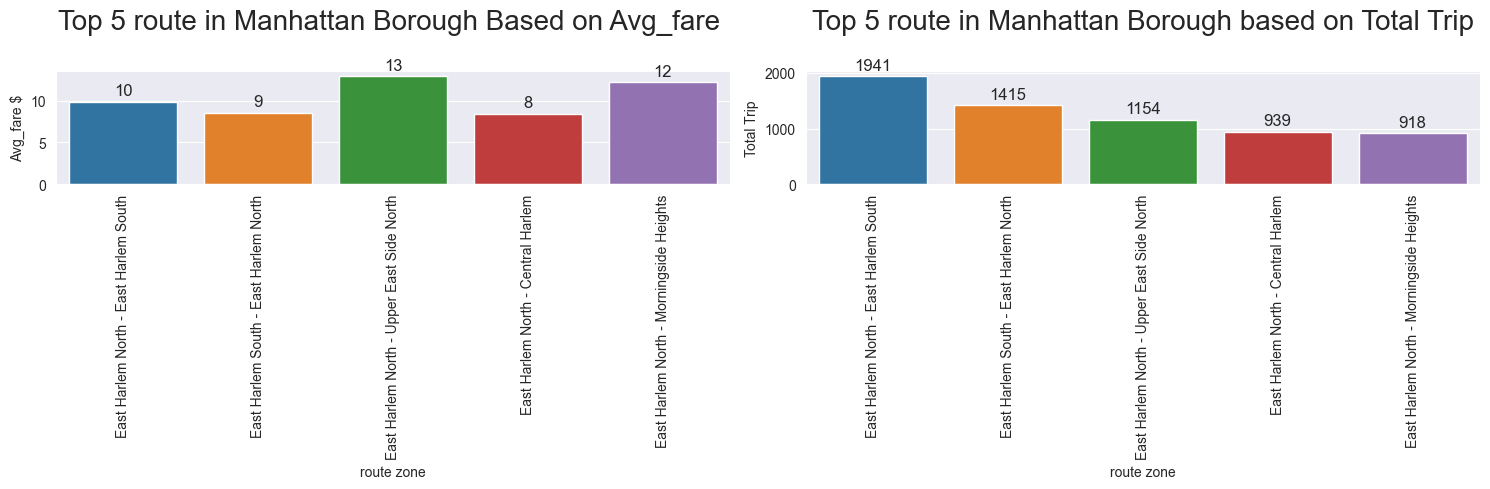

In [1084]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plots = sns.barplot(data = manhattan_trip_amount.head(5),
            x='Route', 
            y='avg_fare',
            ci = 0,
            palette='tab10')

for bar in plots.patches:
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
    
plt.xticks(rotation=90)    
plt.title('Top 5 route in Manhattan Borough Based on Avg_fare ', fontsize=20, pad = 30)   
plt.xlabel('route zone')
plt.ylabel('Avg_fare $')



plt.subplot(1,2,2)
plots = sns.barplot(data = manhattan_trip_amount.head(5),
            x='Route', 
            y='trip_count',
            ci = 0,
            palette='tab10',
            estimator= 'sum')

for bar in plots.patches:
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
    
plt.xticks(rotation=90)   
plt.title('Top 5 route in Manhattan Borough based on Total Trip', fontsize=20, pad= 30)    
plt.xlabel('route zone')
plt.ylabel('Total Trip')

plt.tight_layout()
plt.show()

Insight: 
- Pada manhattan Borough, 5 route yang sering dipesan adalah perjalanan dari:
1. East Harlem North menuju 
    - East Harlem south dengan total perjalanan 1939 dan rata-rata fare 10 dollar.
    - Upper East Side North denga total perjalanan 1154 dan rata-rata fare 13 dollar.
    - Central Harlem dengan total perjalanan 938 dan rata-rata fare 8 dollar
    - Morningside Height dengan total perjalanan 918 dan rata-rata fare 12 dollar
2. East Harlem South menuju East Harlem south dengan total perjalanan 1415 dan rata-rata fare 9 dollar.

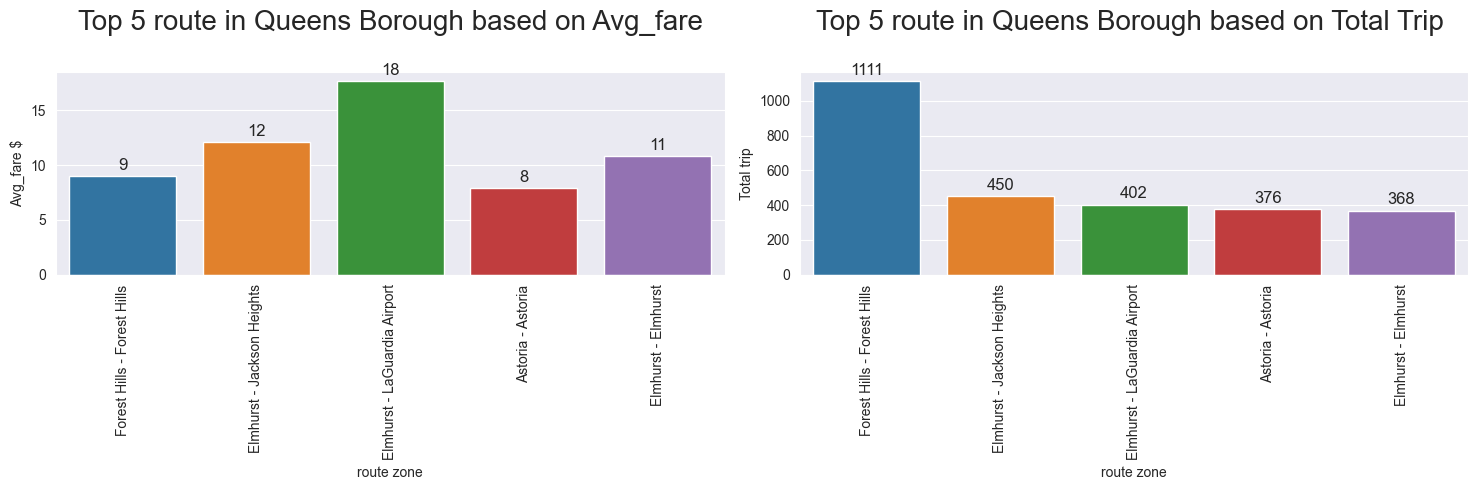

In [1085]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plots = sns.barplot(data = queens_trip_amount.head(5),
            x='Route', 
            y='avg_fare',
            ci = 0,
            palette='tab10')

for bar in plots.patches:
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
    
plt.xticks(rotation=90)    
plt.title('Top 5 route in Queens Borough based on Avg_fare', fontsize=20, pad = 30)   
plt.xlabel('route zone')
plt.ylabel('Avg_fare $')



plt.subplot(1,2,2)
plots = sns.barplot(data = queens_trip_amount.head(5),
            x='Route', 
            y='trip_count',
            ci = 0,
            palette='tab10',
            estimator= 'sum')

for bar in plots.patches:
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
    
plt.xticks(rotation=90)   
plt.title('Top 5 route in Queens Borough based on Total Trip ', fontsize=20, pad= 30)    
plt.xlabel('route zone')
plt.ylabel('Total trip')

plt.tight_layout()
plt.show()

Insight: 
- Pada Queens Borough, 5 route yang sering dipesan adalah perjalanan dari:
1. Forest Hills menuju Forest Hills dengan total perjalanan 1109 dan rata-rata fare 9 dollar.
2. Elmhurst menuju
    - Jakson Heights dengan total perjalanan 450 dan rata-rata fare 12 dollar.
    - LaGuardia Airport dengan total perjalanan 400 dan rata-rata fare 18 dollar.
    - Elmhurst total perjalanan 368 dan rata-rata fare 11 dollar.
3. Astoria menuju Astoria total perjalanan 376 dan rata-rata fare 8 dollar. 

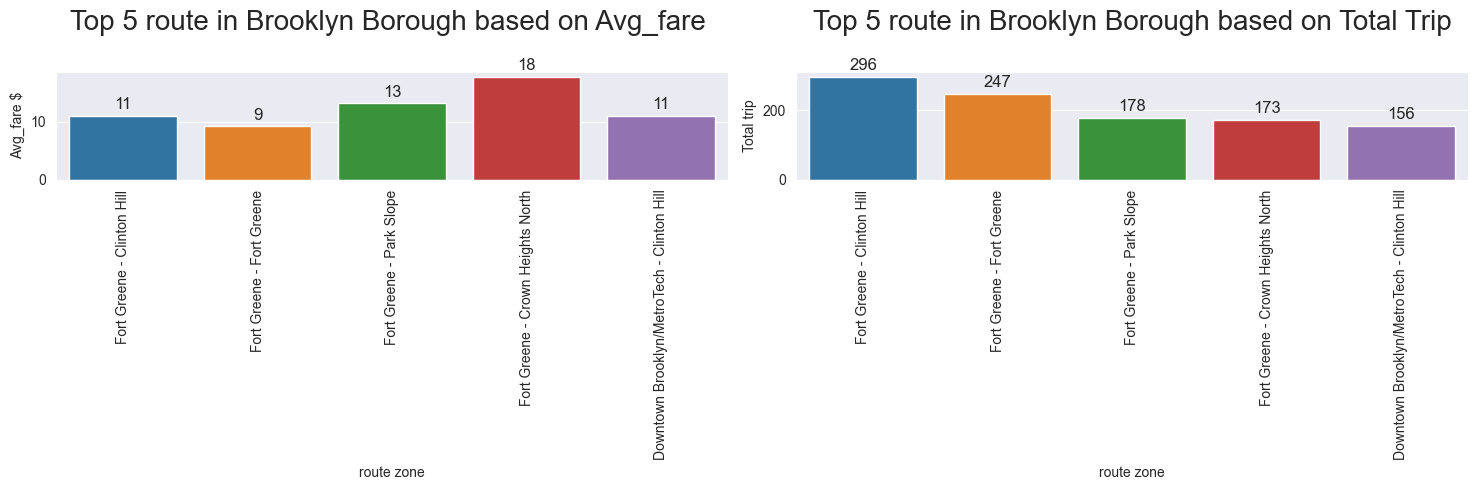

In [1086]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plots = sns.barplot(data = brooklyn_trip_amount.head(5),
            x='Route', 
            y='avg_fare',
            ci = 0,
            palette='tab10')

for bar in plots.patches:
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
    
plt.xticks(rotation=90)    
plt.title('Top 5 route in Brooklyn Borough based on Avg_fare ', fontsize=20, pad = 30)   
plt.xlabel('route zone')
plt.ylabel('Avg_fare $')



plt.subplot(1,2,2)
plots = sns.barplot(data = brooklyn_trip_amount.head(5),
            x='Route', 
            y='trip_count',
            ci = 0,
            palette='tab10',
            estimator= 'sum')

for bar in plots.patches:
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
    
plt.xticks(rotation=90)   
plt.title('Top 5 route in Brooklyn Borough based on Total Trip', fontsize=20, pad= 30)    
plt.xlabel('route zone')
plt.ylabel('Total trip')

plt.tight_layout()
plt.show()

Insight: 
- Pada Brooklyn Borough, 5 route yang sering dipesan adalah perjalanan dari:
1. Fort Grene menuju
    - Clinton Hill dengan total perjalanan 296 dan rata-rata fare 11 dollar.
    - Fort Grene dengan total perjalanan 247 dan rata-rata fare 9 dollar.
    - Park Slope dengan total perjalanan 178 dan rata-rata fare 13 dollar.
    - Crown Heights North dengan total perjalanan 173 dan rata-rata fare 18 dollar. 
2. Downtown Brooklyn menuju Clinton Hill total perjalanan 156 dan rata-rata fare 11 dollar. 

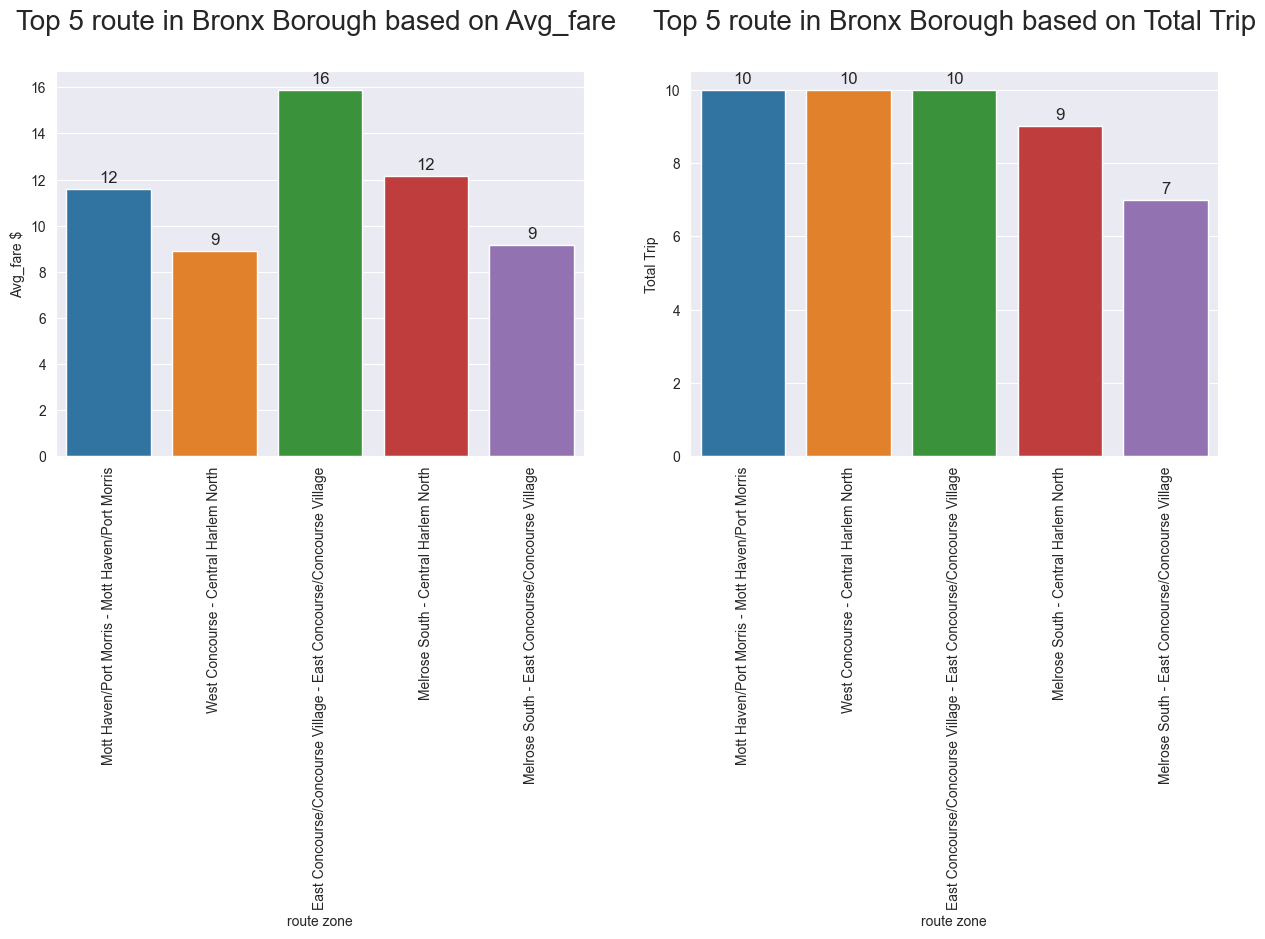

In [1087]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plots = sns.barplot(data = bronx_trip_amount.head(5),
            x='Route', 
            y='avg_fare',
            ci = 0,
            palette='tab10')

for bar in plots.patches:
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
    
plt.xticks(rotation=90)    
plt.title('Top 5 route in Bronx Borough based on Avg_fare ', fontsize=20, pad = 30)   
plt.xlabel('route zone')
plt.ylabel('Avg_fare $')



plt.subplot(1,2,2)
plots = sns.barplot(data = bronx_trip_amount.head(5),
            x='Route', 
            y='trip_count',
            ci = 0,
            palette='tab10',
            estimator= 'sum')

for bar in plots.patches:
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
    
plt.xticks(rotation=90)   
plt.title('Top 5 route in Bronx Borough based on Total Trip', fontsize=20, pad= 30)    
plt.xlabel('route zone')
plt.ylabel('Total Trip')

plt.tight_layout()
plt.show()

Insight: 
- Pada Bronx Borough, 5 route yang sering pesan adalah perjalanan dari:
1. Mott Haven menuju Mott Haven dengan total perjalanan 10 dan rata-rata fare 12 dollar.
2. West Concourse menuju Clinton Harlem North dengan total perjalanan 10 dan rata-rata fare 9 dollar.
3. East Concourse menuju East Concourse dengan total perjalanan 10 dan rata-rata fare 16 dollar.
4. Melrose South menuju 
    - Central Harlem North dengan total perjalanan 9 dan rata-rata fare 12 dollar.
    - East Concourse dengan total perjalanan 7 dan rata-rata fare 9 dollar.

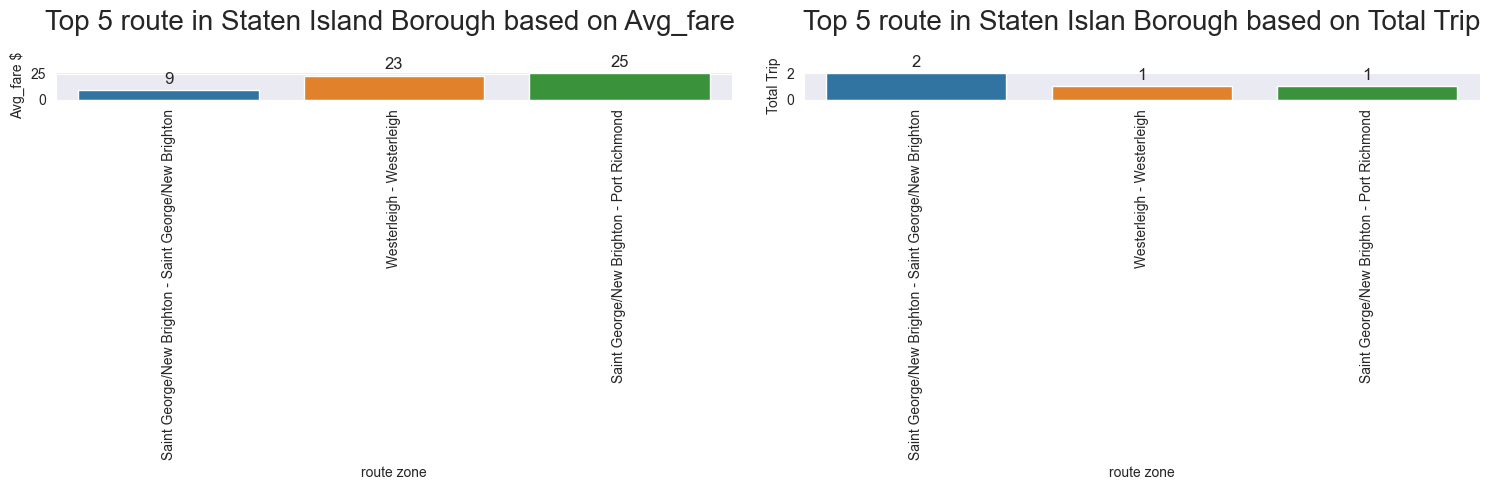

In [1088]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plots = sns.barplot(data = si_trip_amount.head(3),
            x='Route', 
            y='avg_fare',
            ci = 0,
            palette='tab10')

for bar in plots.patches:
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
    
plt.xticks(rotation=90)    
plt.title('Top 5 route in Staten Island Borough based on Avg_fare ', fontsize=20, pad = 30)   
plt.xlabel('route zone')
plt.ylabel('Avg_fare $')



plt.subplot(1,2,2)
plots = sns.barplot(data = si_trip_amount.head(3),
            x='Route', 
            y='trip_count',
            ci = 0,
            palette='tab10',
            estimator= 'sum')

for bar in plots.patches:
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
    
plt.xticks(rotation=90)   
plt.title('Top 5 route in Staten Islan Borough based on Total Trip', fontsize=20, pad= 30)    
plt.xlabel('route zone')
plt.ylabel('Total Trip')

plt.tight_layout()
plt.show()

Insight: 
- Pada Staten Island Borough, Perjalanan taxi yang dilakukan oleh pelanggan merupakan yang paling rendah.

**Top 5 Pick Up Zone with Total Fare in each Borough**

In [1089]:
# Membuat zona dengan total perjalanan  terbesar di setiap Borough
manhattan = df_clean[df_clean['pickup_borough'] == 'Manhattan']
manhattan = manhattan.groupby('pickup_zone').agg(total_perjalanan=('pickup_zone', 'count')).sort_values(by='total_perjalanan', ascending=False).reset_index()

queens = df_clean[df_clean['pickup_borough'] == 'Queens']
queens = queens.groupby('pickup_zone').agg(total_perjalanan=('pickup_zone', 'count')).sort_values(by='total_perjalanan', ascending=False).reset_index()

brooklyn = df_clean[df_clean['pickup_borough'] == 'Brooklyn']
brooklyn = brooklyn.groupby('pickup_zone').agg(total_perjalanan=('pickup_zone', 'count')).sort_values(by='total_perjalanan', ascending=False).reset_index()

bronx = df_clean[df_clean['pickup_borough'] == 'Bronx']
bronx = bronx.groupby('pickup_zone').agg(total_perjalanan=('pickup_zone', 'count')).sort_values(by='total_perjalanan', ascending=False).reset_index()

staten_island = df_clean[df_clean['pickup_borough'] == 'Staten Island']
staten_island = staten_island.groupby('pickup_zone').agg(total_perjalanan=('pickup_zone', 'count')).sort_values(by='total_perjalanan', ascending=False).reset_index()

In [1090]:
# Membuat zona dengan fare_amount terbesar di setiap Borough
manhattan_fare = df_clean[df_clean['pickup_borough'] == 'Manhattan']
manhattan_fare = manhattan_fare.groupby('pickup_zone')[['fare_amount']].sum().sort_values(by='fare_amount', ascending=False).reset_index()

queens_fare = df_clean[df_clean['pickup_borough'] == 'Queens']
queens_fare = queens_fare.groupby('pickup_zone')[['fare_amount']].sum().sort_values(by='fare_amount', ascending=False).reset_index()

brooklyn_fare = df_clean[df_clean['pickup_borough'] == 'Brooklyn']
brooklyn_fare = brooklyn_fare.groupby('pickup_zone')[['fare_amount']].sum().sort_values(by='fare_amount', ascending=False).reset_index()

bronx_fare = df_clean[df_clean['pickup_borough'] == 'Bronx']
bronx_fare = bronx_fare.groupby('pickup_zone')[['fare_amount']].sum().sort_values(by='fare_amount', ascending=False).reset_index()

staten_island_fare = df_clean[df_clean['pickup_borough'] == 'Staten Island']
staten_island_fare = staten_island_fare.groupby('pickup_zone')[['fare_amount']].sum().sort_values(by='fare_amount', ascending=False).reset_index()

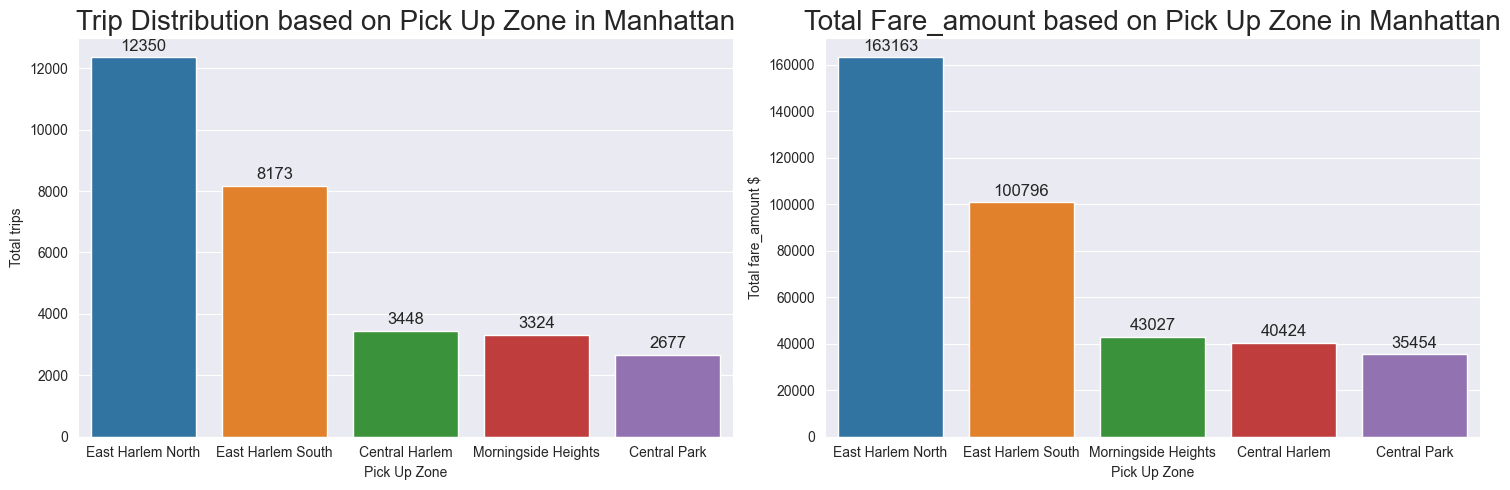

In [1091]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plots = sns.barplot(data = manhattan.head(5),
            x='pickup_zone', 
            y='total_perjalanan',
            ci = 0,
            palette='tab10')

for bar in plots.patches:
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
    
plt.title('Trip Distribution based on Pick Up Zone in Manhattan', fontsize=20)   
plt.xlabel('Pick Up Zone')
plt.ylabel('Total trips')



plt.subplot(1,2,2)
plots = sns.barplot(data = manhattan_fare.head(5),
            x='pickup_zone', 
            y='fare_amount',
            ci = 0,
            palette='tab10',
            estimator= 'sum')

for bar in plots.patches:
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
    
plt.title('Total Fare_amount based on Pick Up Zone in Manhattan', fontsize=20)    
plt.xlabel('Pick Up Zone')
plt.ylabel('Total fare_amount $')

plt.tight_layout()
plt.show()

insight:
- 5 Zona dengan total perjalanan terbanyak pada wilayah Manhattan. Pertama pada zona east harlem north, diikuti dengan East harlem south, pada posisi ketiga adalah central harlem, dilanjutkan dengan morningside heights dan yang terakhir adalah central park.
- untuk fare_amount morning side height lebih besar dibandingkan dengan central harlem.

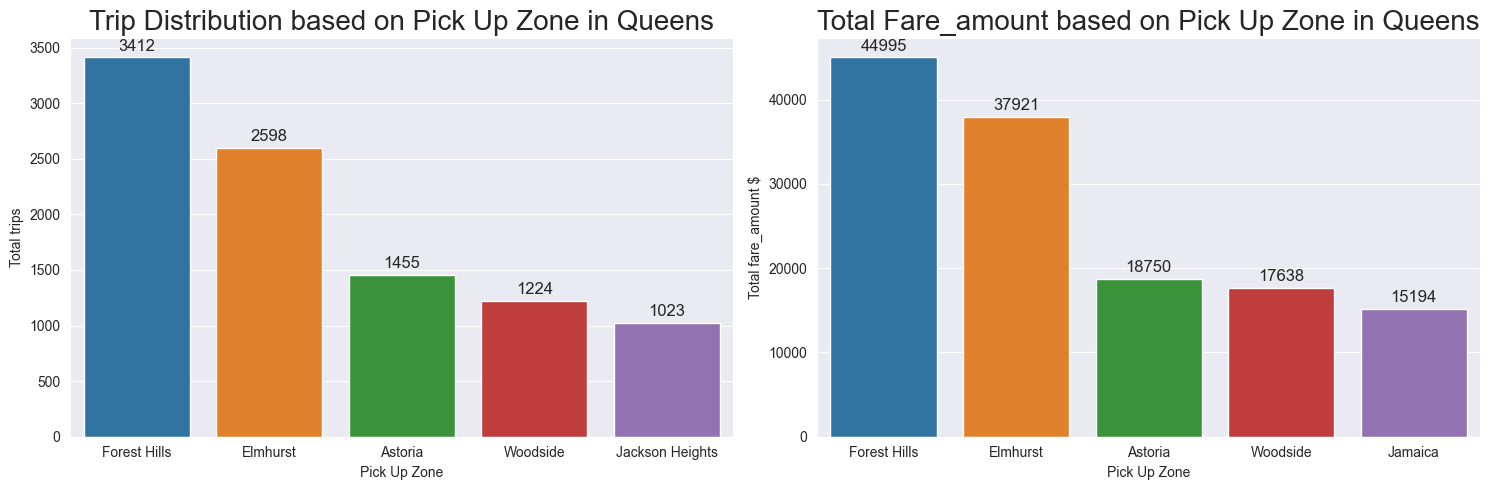

In [1092]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plots = sns.barplot(data = queens.head(5),
            x='pickup_zone', 
            y='total_perjalanan',
            ci = 0,
            palette='tab10')

for bar in plots.patches:
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
    
plt.title('Trip Distribution based on Pick Up Zone in Queens', fontsize=20)   
plt.xlabel('Pick Up Zone')
plt.ylabel('Total trips')



plt.subplot(1,2,2)
plots = sns.barplot(data = queens_fare.head(5),
            x='pickup_zone', 
            y='fare_amount',
            ci = 0,
            palette='tab10',
            estimator= 'sum')

for bar in plots.patches:
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
    
plt.title('Total Fare_amount based on Pick Up Zone in Queens', fontsize=20)    
plt.xlabel('Pick Up Zone')
plt.ylabel('Total fare_amount $')

plt.tight_layout()
plt.show()

insight:
- 5 Zona dengan total perjalanan terbanyak pada wilayah Queens. Pertama pada zona Forest Hills, diikuti dengan elmhurst, pada posisi ketiga adalah Astoria, dilanjutkan dengan woodside dan yang terakhir adalah Jackson Height.
- untuk fare_amount posisi ke 5 berada di zona Jamaica.

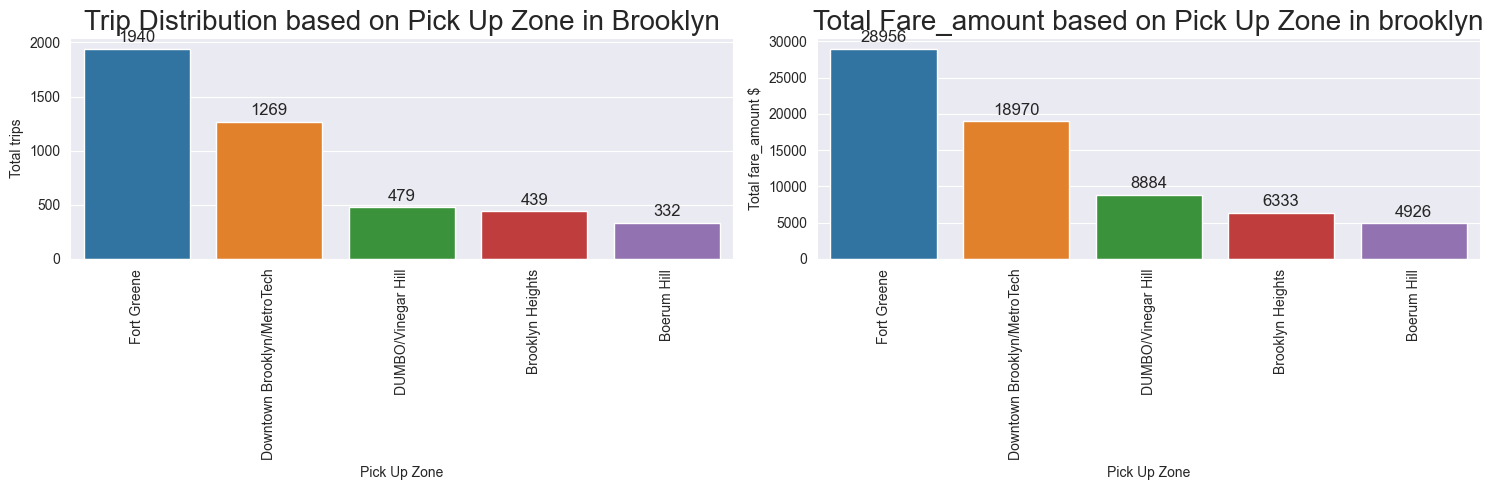

In [1093]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plots = sns.barplot(data = brooklyn.head(5),
            x='pickup_zone', 
            y='total_perjalanan',
            ci = 0,
            palette='tab10')

for bar in plots.patches:
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.xticks(rotation=90)     
plt.title('Trip Distribution based on Pick Up Zone in Brooklyn', fontsize=20)   
plt.xlabel('Pick Up Zone')
plt.ylabel('Total trips')



plt.subplot(1,2,2)
plots = sns.barplot(data = brooklyn_fare.head(5),
            x='pickup_zone', 
            y='fare_amount',
            ci = 0,
            palette='tab10',
            estimator= 'sum')

for bar in plots.patches:
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.xticks(rotation=90)     
plt.title('Total Fare_amount based on Pick Up Zone in brooklyn', fontsize=20)    
plt.xlabel('Pick Up Zone')
plt.ylabel('Total fare_amount $')

plt.tight_layout()
plt.show()

insight:
- 5 Zona dengan total perjalanan terbanyak dan fare_amount terbesar pada wilayah Brooklyn. Pertama pada zona Fort Greene, diikuti dengan Downtown Brooklyn, pada posisi ketiga adalah Vinegar Hill, dilanjutkan dengan Brooklyn Heights dan yang terakhir adalah Boerum hill.

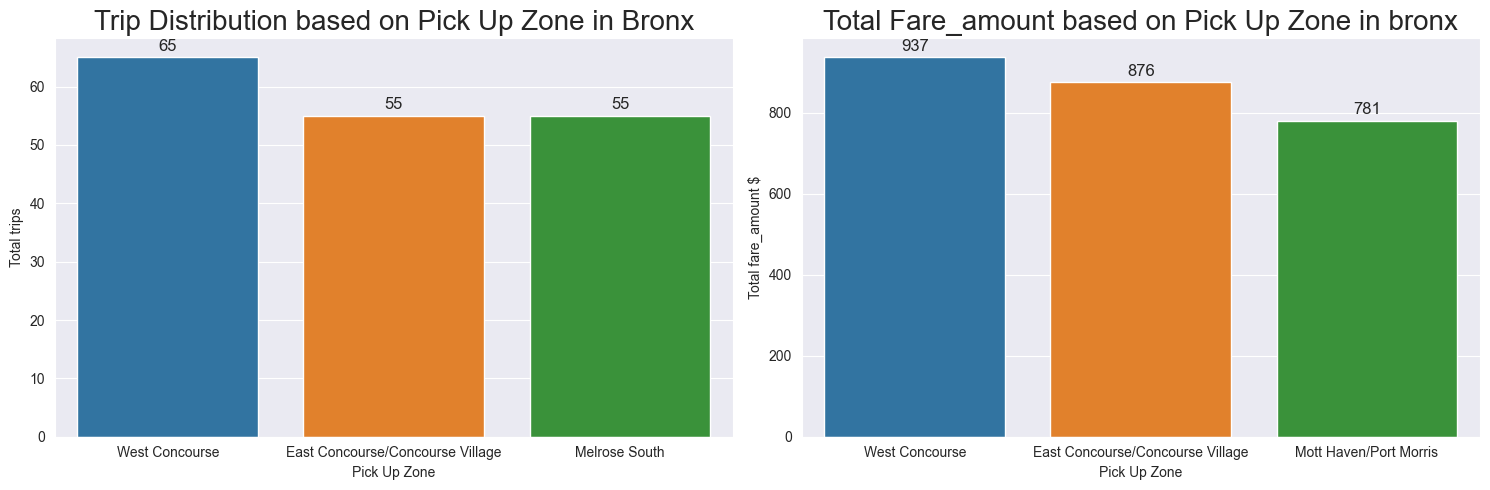

In [1094]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plots = sns.barplot(data = bronx.head(3),
            x='pickup_zone', 
            y='total_perjalanan',
            ci = 0,
            palette='tab10')

for bar in plots.patches:
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
    
plt.title('Trip Distribution based on Pick Up Zone in Bronx', fontsize=20)   
plt.xlabel('Pick Up Zone')
plt.ylabel('Total trips')



plt.subplot(1,2,2)
plots = sns.barplot(data = bronx_fare.head(3),
            x='pickup_zone', 
            y='fare_amount',
            ci = 0,
            palette='tab10',
            estimator= 'sum')

for bar in plots.patches:
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
    
plt.title('Total Fare_amount based on Pick Up Zone in bronx', fontsize=20)    
plt.xlabel('Pick Up Zone')
plt.ylabel('Total fare_amount $')

plt.tight_layout()
plt.show()

insight:
- 3 Zona dengan total perjalanan terbanyak pada wilayah Bronx. Pertama pada zona West Concourse, diikuti dengan East Concourse, pada posisi ketiga adalah melrose South.
- untuk fare_amount pada posisi ketiga diisi oleh Mott Haven.

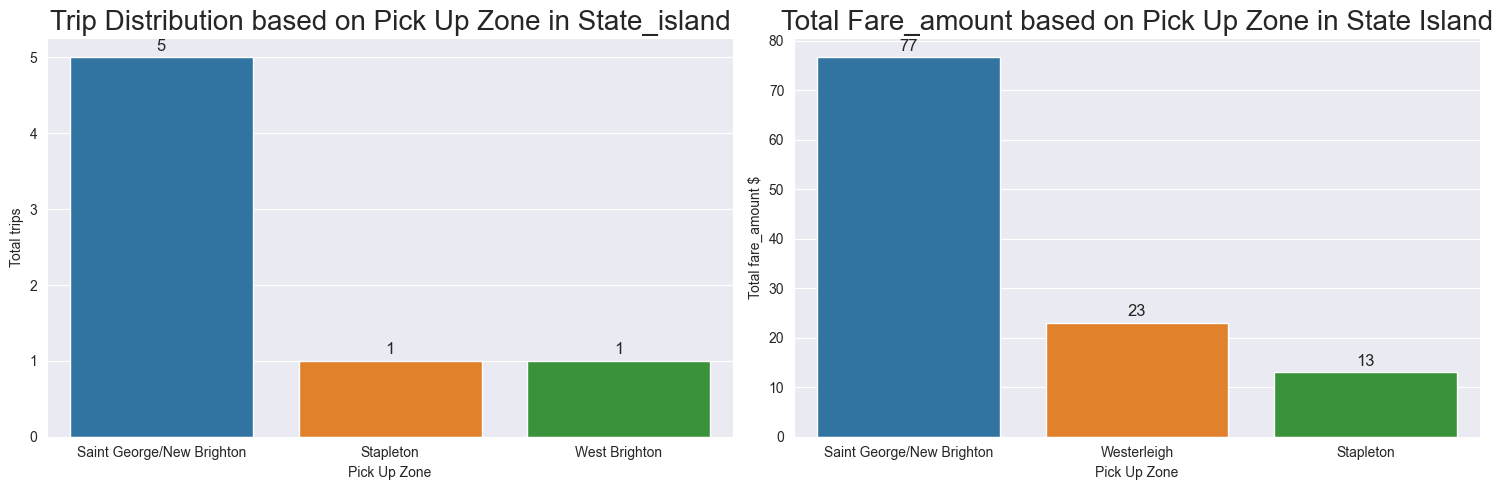

In [1095]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plots = sns.barplot(data = staten_island.head(3),
            x='pickup_zone', 
            y='total_perjalanan',
            ci = 0,
            palette='tab10')

for bar in plots.patches:
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
    
plt.title('Trip Distribution based on Pick Up Zone in State_island', fontsize=20)   
plt.xlabel('Pick Up Zone')
plt.ylabel('Total trips')



plt.subplot(1,2,2)
plots = sns.barplot(data = staten_island_fare.head(3),
            x='pickup_zone', 
            y='fare_amount',
            ci = 0,
            palette='tab10',
            estimator= 'sum')

for bar in plots.patches:
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
    
plt.title('Total Fare_amount based on Pick Up Zone in State Island', fontsize=20)    
plt.xlabel('Pick Up Zone')
plt.ylabel('Total fare_amount $')

plt.tight_layout()
plt.show()

Insight :
- Zone pada wilayah Staten Island memiliki total perjalanan dan fare_amount paling rendah

In [1096]:
def rcode(x): 
    if x == '1':
        return 'Standart'
    if x == '5':
        return 'Negotiate' 
    else:
        return 'Airport'

def pay(x): 
    if x == '1':
        return 'Credit Card'
    if x == '2':
        return 'Cash' 
    else:
        return 'Others'

def trip(x): 
    if x == '1':
        return 'Street-hail'
    else:
        return 'Dispatch'

In [1097]:
ratecode = df_clean.groupby('RatecodeID').agg(count=('RatecodeID', 'count')).sort_values(by='count', ascending=False).reset_index()
ratecode['RatecodeID'] = ratecode['RatecodeID'].apply(rcode)
ratecode = ratecode.groupby('RatecodeID').agg(total=('count', 'sum')).sort_values(by='total', ascending=False).reset_index()

payment = df_clean.groupby('payment_type').agg(count=('payment_type', 'count')).sort_values(by='count', ascending=False).reset_index()
payment['payment_type'] = payment['payment_type'].apply(pay)
payment = payment.groupby('payment_type').agg(total=('count', 'sum')).sort_values(by='total', ascending=False).reset_index()

triptype = df_clean.groupby('trip_type').agg(count=('trip_type', 'count')).sort_values(by='count', ascending=False).reset_index()
triptype['trip_type'] = triptype['trip_type'].apply(trip)
triptype = triptype.groupby('trip_type').agg(total=('count', 'sum')).sort_values(by='total', ascending=False).reset_index()

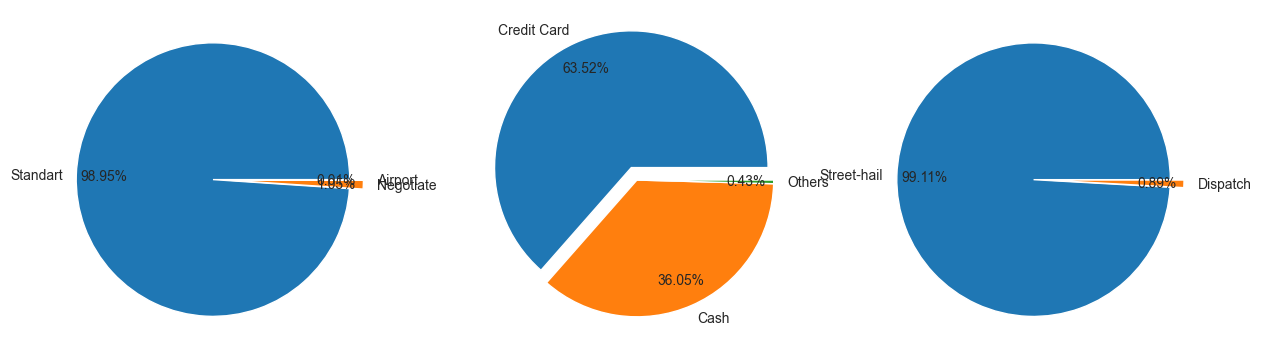

In [1098]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.pie(x=ratecode['total'], 
        labels=ratecode['RatecodeID'], 
        pctdistance=0.8, 
        autopct='%1.2f%%', 
        explode=(0.1,0,0))

plt.subplot(1,3,2)
plt.pie(x=payment['total'], 
        labels=payment['payment_type'], 
        pctdistance=0.8, 
        autopct='%1.2f%%', 
        explode=(0.1,0,0))

plt.subplot(1,3,3)
plt.pie(x=triptype['total'], 
        labels=triptype['trip_type'], 
        pctdistance=0.8, 
        autopct='%1.2f%%', 
        explode=(0.1,0))
plt.show()

Insight:
- Hampir seluruh pelanggan menggunakan jasa taxi untuk jenis tarif standart rate dengan tipe perjalanan street-hail.
- tipe pembayaran yang sering digunakan adalah credit card.

## **Correlation**

In [1099]:
# Karena data tidak terdistribusi normal, saya akan menggunakan Spearman Correlation.
x = df_clean[['duration_time','tip_amount','trip_distance','fare_amount']]

In [1100]:
x.corr(method='spearman')

,duration_time,tip_amount,trip_distance,fare_amount
duration_time,1.000000,0.243999,0.821849,0.922675
tip_amount,0.243999,1.000000,0.270656,0.272712
trip_distance,0.821849,0.270656,1.000000,0.925058
fare_amount,0.922675,0.272712,0.925058,1.000000


In [1101]:
# np.triu --> upper triangle
matrix_triu = np.triu(x.corr('spearman'))
matrix_triu

array([[1.        , 0.24399887, 0.82184864, 0.92267487],
       [0.        , 1.        , 0.2706557 , 0.27271206],
       [0.        , 0.        , 1.        , 0.92505802],
       [0.        , 0.        , 0.        , 1.        ]])

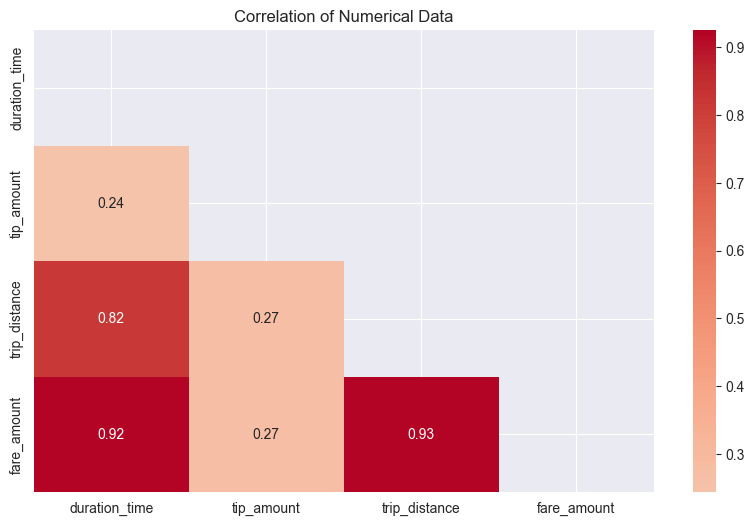

In [1102]:
plt.figure(figsize=(10,6))
# visualisasi menggunakan heatmap
sns.heatmap(data = x.corr('spearman'),
            annot=True,
            cmap='coolwarm',
            mask = matrix_triu,
            center=0)

plt.title('Correlation of Numerical Data')
plt.show()

**Insight:**
- Warna yang semakin merah pekat, menandakan semakin kuat positif correlationnya
- Warna yang semakin cream, menandakan semakin lemah correlationnya
1. fare_amount dengan trip_distance (0.92):
terdapat korelasi positif yang sangat kuat, artinya semakin jauh perjalanan yang ditempuh, maka akan semakin tinggi fare amount yang dihasilkan.

2. fare_amount dengan duration_time (0.92):
terdapat korelasi positif yang sangat kuat, artinya semakin lama durasi perjalan, maka akan semakin tinggi fare_amount yang dihasilkan.

3. trip_distance dengan duration_time (0.82):
terdapat koralasi positif yang kuat, artinya semakin lama jauh perjalanan yand ditempuh, maka akan semakin lama waktu yang dibutuhkan untuk tiba.

4. tip_amount dengan duration_time (0.24):
memiliki korelasi positif lemah, artinya lamanya durasi perjalanan bukan faktor utama yang mempengaruhi pelanggan untuk memberikan tip.

5. tip_amount dengan fare_amount (0.26):
memiliki korelasi positif lemah, artinya besarnya fare_amount bukan faktor utama yang mempengaruhi pelanggan untuk memberikan tip.

6. tip_amount dengan trip_distance (0.26):
memiliki korelasi positif lemah, artinya jauhnya jarak yang ditempuh bukan faktor utama yang mempengaruhi pelanggan untuk memberikan tip.

## **Conclusion**

- rata-rata pendapatan (fare_amoun) paling tinggi terjadi pada tanggal 16 januari 2023 sebesar 14 dollar.
- jumlah permintaan pengantaran palingt tinggi terjadi pada tanggal 25 januari 2023 sebanyak 2200 perjalanan.
- Pola pemesanan taksi pada hari weekdays berangsur meningkat setiap harinya dan cenderung menurun pada weekend.
- Berdasarkan working hours, sore hari sampai malam (15pm - 19pm) merupakan pesanan tertinggi, sedangkan pada malam hari menuju pagi (20pm - 7am) pesanan mengalami penurunan dan cenderung rendah.
- Pelanggan lebih memilih menggunakan taxi melalui cara Street-hail (99.11%) dan menggunakan metode pembayaran credit (63.43%) serta menggunakan tarif standart (98.94%)
- Manhattan Borough merupakan wilayah yang paling potensial karena memiliki jumlah perjalanan yang paling banyak dan total fare_amount yang paling besar.
- Staten Islan merupaj wilayah yang tidak produktif karena memiliki jumlah perjalanan dan total fare_amount terendah diantara wilayah lainnya.
- Pada Manhattan borough, peak hours mulai terjadi pada pukul 8am - 18pm.
- Pada Queens borough, peak hours terjadi pada pukul 15pm - 19pm.
- Pada Brooklyn borough, peak hours terjadi pada 15pm - 20pm.
- Pada Bronx borough, peak hours terjadi pada 14pm - 20pm.
- Pada staten Island, pemesanan masih sangat rendah dan cenderung tidak ada pada jam tertentu.
- 5 Zona dengan total perjalanan terbanyak pada wilayah Manhattan. Pertama pada zona east harlem north, diikuti dengan East harlem south, pada posisi ketiga adalah central harlem, dilanjutkan dengan morningside heights dan yang terakhir adalah central park. Rute peringkat 1 yang paling banyak dipesan oleh pelanggan adalah East Harlem North menuju East Harlem south dengan total perjalanan 1939 dan rata-rata fare 10 dollar.
- 5 Zona dengan total perjalanan terbanyak pada wilayah Queens. Pertama pada zona Forest Hills, diikuti dengan elmhurst, pada posisi ketiga adalah Astoria, dilanjutkan dengan woodside dan yang terakhir adalah Jackson Height. 1. Rute peringkat 1 yang paling banyak dipesan oleh pelanggan adalah Forest Hills menuju Forest Hills dengan total perjalanan 1109 dan rata-rata fare 9 dollar.
- 5 Zona dengan total perjalanan terbanyak dan fare_amount terbesar pada wilayah Brooklyn. Pertama pada zona Fort Greene, diikuti dengan Downtown Brooklyn, pada posisi ketiga adalah Vinegar Hill, dilanjutkan dengan Brooklyn. Rute peringkat 1 yang paling banyak dipesan oleh pelangan adalah Fort Grene menuju Clinton Hill dengan total perjalanan 296 dan rata-rata fare 11 dollar.
- 3 Zona dengan total perjalanan terbanyak pada wilayah Bronx. Pertama pada zona West Concourse, diikuti dengan East Concourse, pada posisi ketiga adalah melrose South. Rute peringkat 1 yang paling banyak dipesan oleh pelangan adalah East Concourse menuju East Concourse dengan total perjalanan 10 dan rata-rata fare 16 dollar.
- Staten Island merupakan borough yang memiliki performa palin rendah baik dari fare amount maupun total perjalanan
- Trip_distance, Fare_amount dan Duration_time memiliki korelasi yang sangant lemah terhadap tip_amount.



**Rekomendasi**

1. Pendistribusian Taxi.
- Pada weekdays, jumlah ketersediaan taksi dapat ditingkatkan, terutama pada hari rabu dan kamis. 
- Mengoptimalkan alokasi driver pada saat terjadi peak hours, yaitu pukul 3pm - 19pm. 
- Mengurangi jumlah taksi pada tengah malam - dini hari.

2. Potensi Borough dan Zona 
- Meningkatkan jumlah ketersediaan taksi pada wilayah Manhattan, Queens dan Broklyn. Karena 3 Borough ini memiliki permintaan perjalanan lebih besar dibanding wilayah lainnya.
- Melakukan indetifikasi pada wilayah Staten Island yang memiliki permintaan perjalanan terendah.
- Mengoptimalkan alokasi driver pada zona - zona dengan permintaan tertinggi pada wilayah Manhattan, Queens dan broklyn.

3. Strategi mendapatkan Pendapatan.
- Melakukan penyesuaian harga tarif terutama saat terjadi lonjakan permintaan pada peak hours. Misalkan menaikkan tarif beberapa persen dari tarif biasanya.
- Memberikan harga promo pada saat permintaan rendah pada malam pukul 21pm - pagi pukul 5am.
- Memberikan harga promo pada wilayah dan zona yang memiliki permintaan rendah dengan tujuan untuk menarik perhatian pelanggan.

4. Opsi pembayaran.
- Memberikan Opsi pembayaran lain kepada pelanggan seperti e-wallet atau scan QR code.
  

https://public.tableau.com/app/profile/sylvan.anugrah/viz/DashboardNYCTCL/Summary?publish=yes